# data

In [1]:
import pandas as pd
a8=pd.read_csv(r"d:\iris.csv")
df8=a8[['v1','v2','v3','v4']].values

In [695]:
import pandas as pd
aa=pd.read_csv(r"d:\USArrests_data.csv")
df2=aa[['Murder','Assault','UrbanPop','Rape']]
df5 = df2.values

In [3]:
a6=pd.read_csv(r"d:\protein.csv")
df6=a6[['v1','v2','v3','v4','v5','v6','v7','v8','v9']].values


In [4]:
import numpy as np
df9=np.array([[4, 1, 3, 7, 2, 3, 4, 3, 4, 1],
       [6, 5, 6, 8, 3, 3, 4, 3, 4, 2],
       [5, 4, 5, 9, 3, 5, 6, 4, 4, 3],
       [4, 2, 5, 6, 3, 4, 4, 3, 4, 3],
       [5, 6, 7, 8, 3, 6, 7, 4, 6, 3],
       [6, 4, 5, 8, 2, 5, 6, 4, 5, 3],
       [5, 2, 5, 8, 2, 4, 7, 3, 6, 5],
       [6, 2, 5, 7, 3, 5, 6, 3, 4, 3],
       [4, 2, 4, 7, 3, 4, 7, 4, 6, 2],
       [4, 5, 5, 7, 3, 5, 6, 4, 5, 2],
       [4, 3, 6, 7, 3, 4, 4, 3, 4, 3],
       [5, 2, 4, 8, 2, 4, 6, 3, 5, 2],
       [5, 3, 5, 8, 3, 4, 5, 3, 4, 3],
       [5, 3, 5, 8, 3, 3, 5, 4, 4, 4],
       [4, 4, 5, 7, 4, 2, 7, 4, 6, 3],
       [4, 3, 4, 7, 3, 4, 5, 3, 3, 4],
       [5, 3, 5, 7, 2, 4, 5, 4, 5, 3],
       [5, 3, 5, 7, 2, 5, 5, 4, 4, 3],
       [7, 7, 6, 9, 3, 5, 5, 4, 5, 4],
       [5, 3, 5, 8, 2, 5, 5, 4, 5, 3],
       [4, 3, 5, 7, 3, 3, 7, 3, 5, 2],
       [4, 1, 5, 6, 3, 5, 6, 2, 5, 3],
       [5, 2, 4, 7, 3, 4, 5, 3, 4, 4],
       [4, 5, 6, 8, 3, 5, 6, 4, 5, 2],
       [3, 3, 4, 6, 2, 4, 5, 3, 5, 3],
       [6, 3, 5, 7, 2, 4, 3, 4, 4, 3],
       [6, 4, 6, 8, 3, 4, 4, 4, 4, 5],
       [5, 1, 4, 7, 3, 4, 5, 2, 5, 3],
       [4, 5, 5, 7, 3, 5, 5, 3, 4, 3],
       [5, 5, 6, 8, 3, 5, 6, 4, 5, 2]])

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
file_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
wine_data = pd.read_csv(file_path, sep=';')  # استخدم sep=';' لأن البيانات مفصولة بفواصل منقوطة
wine_data = wine_data.iloc[:, :-1]  #حذف آخر عمود
wine_array = wine_data.to_numpy()
df13=wine_array
#print("\nشكل المصفوفة:")
#print(wine_array.shape)
#print("\nالمصفوفة:")
#print(df13)
scaler = StandardScaler()
df13_st = scaler.fit_transform(df13)

In [1129]:
##########  مضاعفة قاعدة البيانات

import pandas as pd
data=df13
df13_3 = np.vstack([data, data, data])
#df13_doubled_twice = pd.concat([df13, df13, df13], ignore_index=True)

# Dunn

In [6]:
##########    Dunn   ###########

import numpy as np
from sklearn.metrics import pairwise_distances

def dunn_index(labels, data):
    distances = pairwise_distances(data)     # حساب المسافات بين النقاط


    unique_labels = np.unique(labels)    # الحصول على الكتل الفريدة
    num_clusters = len(unique_labels)

    inter_cluster_distances = []    # حساب أكبر مسافة بين الكتل
    for i in range(num_clusters):
        for j in range(i + 1, num_clusters):
            inter_distance = np.min(distances[labels == unique_labels[i], :][:, labels == unique_labels[j]])
            inter_cluster_distances.append(inter_distance)

  
    intra_cluster_distances = []    # حساب أصغر مسافة داخل الكتل
    for label in unique_labels:
        cluster_points = data[labels == label]
        if len(cluster_points) > 1:
            intra_distance = np.max(pairwise_distances(cluster_points))
            intra_cluster_distances.append(intra_distance)

    # حساب مؤشر Dunn
    dunn_index_value = np.min(inter_cluster_distances) / np.max(intra_cluster_distances) if intra_cluster_distances else 0
    return dunn_index_value

# silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [7]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
def result_1(data, labels,centers):
    distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)    
    wcss = np.sum(np.min(distances, axis=1)**2)
    print(f"WCSS     : {round(wcss,3)}")
    silhouette_avg = silhouette_score(data, labels)
    print(f"Sil      : {round(silhouette_avg,3)}")
    db_index = davies_bouldin_score(data, labels)
    print(f"DB       : {round(db_index,3)}")
    ch_index = calinski_harabasz_score(data, labels)
    print(f"CH       : {round(ch_index,3)}")
    Dunn_=  dunn_index(labels, data)
    print(f"Dunn     : {round(Dunn_,4)}")
    return wcss, silhouette_avg ,db_index , ch_index
  

# الخوارزمية 2

In [1002]:

############## الخوارزمية المقترحة 2   بعد التعديلات 

import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial import distance
#labels, centers,wss = lloyd_kmeans(data, k)
#labels, centers,wss= MacQueen_kmeans(data, k)
#labels, centers,wss= My_kmeans(data, k)
# labels_1=labels
# centers_1=centers
#Point_Num=4
def My2_kmeans(data, k, max_iterations=100):

# Point_Num=4

# إنشاء مصفوفة لتخزين المسافات
    #distances = np.zeros((len(data), len(centers_1)))
    zz=1
    for zz in range(6):   ##################     6 $$$$$$$$$$$$$$$$$$$$
        distances = np.zeros((len(data), len(centers_1)))

# حساب المسافات بين كل نقطة ومراكز العناقيد
        for i in range(len(data)): 
            for j in range(len(centers_1)):
                distances[i][j] = distance.euclidean(data[i], centers_1[j])
# إيجاد التصنيف الاول والثاني والفرق لكل نقطة
        sorted_indices = np.argsort(distances, axis=1)
        first_nearest_cluster = sorted_indices[:, 0]
        second_nearest_cluster = sorted_indices[:, 1]
        first_nearest_distance = distances[np.arange(len(data)), first_nearest_cluster]
        second_nearest_distance = distances[np.arange(len(data)), second_nearest_cluster]
        difference = np.abs(second_nearest_distance - first_nearest_distance)
    # انشاء مصفوفة فيها ID  مع  Lables   ارقام العناقيد
        sequential_numbers = np.arange(len(data))   # إنشاء مصفوفة تسلسلية من الأرقام
        sequential_numbers = np.reshape(sequential_numbers, (len(data), 1))   # تغيير شكل المصفوفة لتصبح عمودية
        A1=result_with_sequence = np.concatenate((sequential_numbers, labels_1[:, np.newaxis]), axis=1)  # دمج المصفوفة المتسلسلة وعمود "labels_1"
        #print(A1)
    # دمج المصفوفات first_nearest_cluster و second_nearest_cluster و difference
        new_columns = np.concatenate((first_nearest_cluster[:, np.newaxis], second_nearest_cluster[:, np.newaxis], difference[:, np.newaxis]), axis=1)
        A2=new_result = np.concatenate((A1, new_columns), axis=1) # دمج المصفوفة new_columns مع المصفوفة result_with_sequence
    
        sorted_indices = np.argsort(new_result[:, -1]) # الحصول على مؤشرات الصفوف المرتبة وفقًا لقيمة difference
        B1=sorted_new_result = new_result[sorted_indices] # إعادة ترتيب المصفوفة وفقًا للمؤشرات المرتبة

    # الحصول على القيم غير المكررة ومؤشراتها من الأعمدة first_nearest_cluster و second_nearest_cluster
        unique_values, unique_indices = np.unique(B1[:, [2, 3]], axis=0, return_index=True)
        B2=unique_sorted_new_result = sorted_new_result[unique_indices]  # إعادة ترتيب المصفوفة غير المكررة وفقًا لمؤشراتها
    
    # الحصول على مؤشرات الصفوف المرتبة وفقًا لقيمة difference  والغير مكررة 
        sorted_indices = np.argsort(unique_sorted_new_result[:, -1])
        B3= sorted_unique_sorted_new_result = unique_sorted_new_result[sorted_indices] #  إعادة ترتيب المصفوفة وفقًللقيمة فرق المسافتين ا  
    #print(B3)
# استخراج القيم لكل سطر في المصفوفة B3   (B3 هي مصفوفة فقط لمعرفة اي العناقيد متجاورة)
        num_rows = B3.shape[0]
        for i in range(1):   
            column_3_value = B3[i, 2]    # الحصول على قيمة العمود الثالث من السطر الحالي في المصفوفة B3    
            column_4_value = B3[i, 3]    # الحصول على قيمة العمود الرابع من السطر الحالي في المصفوفة B3   
            matching_rows_A2 = A2[(A2[:, 2] == column_3_value) & (A2[:, 3] == column_4_value)]   # النقاط(بين العنقودين) التي سيتم اختبارها
            sorted_indices_C1 = np.argsort(matching_rows_A2[:, 4])
            C1=sorted_matching_rows_A2 = matching_rows_A2[sorted_indices_C1] # مصفوفة النقاط المشركة بين العنقودين المتجاورين مرتبة تصاعديا
            #print(C1)
        
            cluster_numbers = A2[:, 1]       
            cluster_points_closet = data[A2[:, 1] == column_3_value, :]  #مركز العنقود الاقرب 
            cluster_center_closet = np.mean(cluster_points_closet, axis=0)

            cluster_points_2closet = data[A2[:, 1] == column_4_value, :]  #مركز العنقود ثاني اقرب
            cluster_center_2closet = np.mean(cluster_points_2closet, axis=0)
        
            num_rows_C1 = C1.shape[0]  #   المصفوفة التي يتم اختبارها C1 حدود قيمة z  عدد النقاط التي سيتم استبعادها
            AA1=A1
            for z in range(Point_Num):                               # عدد النقاط التي سيتم استبعداها     num_rows_C1-1
            #AA1=A1
                
                point_ID=int(C1[z][0])
                AA1[point_ID,1]=888
                cluster_points_closet = data[AA1[:, 1] == column_3_value, :]  #مركز العنقود الاقرب 
                cluster_center_closet = np.mean(cluster_points_closet, axis=0)
            
                cluster_points_888 = data[AA1[:, 1] == 888, :]  #مركز العنقود الاقرب 
                cluster_center_888 = np.mean(cluster_points_888, axis=0)

                D1=distance.euclidean(cluster_center_closet, cluster_center_888)
                D2=distance.euclidean(cluster_center_2closet, cluster_center_888)
                if(D1>D2 ):  #or z==num_rows_C1-3
                    AA1[AA1[:, 1] == 888, 1] = column_4_value  # اريد استبدال جميع القيم 888 بقيمة column_4_value
                    AA1[AA1[:, 1] == 888, 1] = column_3_value  #  888 الى ماكانت عليهاذا تم الوصول الى كل الصفوف ولم يتغيير شي اعادة النقاط التي اخذت 
                    for i in range(len(labels_1)):
                        labels_1[i]=AA1[i,1]
                    for j in range(k): 
                            cluster_points_1 = data[labels_1 == j]   
                            if len(cluster_points_1) > 0:
                               centers_1[j] = cluster_points_1.mean(axis=0)

                    centers=centers_1
                    labels=labels_1
                    prev_centers = np.copy(centers)
                    for iter in range(max_iterations):
                        for i in range(len(data)):
                            point = data[i]
                            distances = np.linalg.norm(point - centers, axis=1)
                            cluster_index = np.argmin(distances)
                            dist_to_nearest_cluster = distances[cluster_index]
                            if (labels[i]==cluster_index):
                                sorted_distances_indices = np.argsort(distances)
                                second_nearest_cluster_index = sorted_distances_indices[1]
                                dist_to_second_nearest_cluster = distances[second_nearest_cluster_index]
                                num_points_in_nearest_cluster = np.sum(labels == cluster_index)
                                if num_points_in_nearest_cluster > 1:
                                    D = (dist_to_nearest_cluster ) / (num_points_in_nearest_cluster - 1) + dist_to_nearest_cluster
                                else:
                                    D = dist_to_nearest_cluster
                                E = dist_to_second_nearest_cluster
                                if E < D:
                                    labels[i] = second_nearest_cluster_index
                            else:
                                labels[i]=cluster_index                       
                            for j in range(k): 
                                cluster_points = data[labels == j]   
                                if len(cluster_points) > 0:
                                    centers[j] = cluster_points.mean(axis=0)
                        if np.all(centers == prev_centers):
                            break                   
                    break
               
           
    distances = np.linalg.norm(data[:, np.newaxis] - centers_1, axis=2)
    sse = np.sum(np.min(distances, axis=1)**2)
    
    return labels_1, centers_1,sse



# The Suggested algorithm I 

In [34]:
############    The Suggested algorithm I    ########

import numpy as np
def My_kmeans_2(data, k, max_iterations=100):
   # if __name__ == "__main__":
    # center = calculate_center(data)    
    # point_a, point_b = select_extreme_points(data, center)
    # # حفظ النقطتين كـ center
    # centers_int_2 = np.array([point_a, point_b]) if point_a is not None and point_b is not None else None    
    # centers=centers_int_2
    # print(centers_int_2)
    
    distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)    
    labels = np.argmin(distances, axis=1)
         
    prev_centers = np.copy(centers)
    wss=0.0
    #print(centers)
    a=0
    #Start repeating until there is no change in centers
    for iter in range(max_iterations):
       
        # Assign each point to the nearest center
        for i in range(len(data)):              
            point = data[i]
            # The distance between point i and the centers
            distances = np.linalg.norm(point - centers, axis=1)
            #Cluster number closest to the point i
            cluster_index = np.argmin(distances)
            # The value of the distance between point i and its nearest cluster
            dist_to_nearest_cluster = distances[cluster_index]
            
            # Test whether point i is located in the cluster nearest to it
            if (labels[i]==cluster_index): 
                #Arrange the distances in ascending order between point i and the centers
                sorted_distances_indices = np.argsort(distances) 
                #The number of the second nearest cluster to point i
                second_nearest_cluster_index = sorted_distances_indices[1]
                # The distance of the second closest cluster to point i
                dist_to_second_nearest_cluster = distances[second_nearest_cluster_index]  
                #The number of points in the cluster closest to the point i (n)
                num_points_in_nearest_cluster = np.sum(labels == cluster_index)
                
                # Precautionary condition (non-divisibility)  n>1
                if num_points_in_nearest_cluster > 1:
                    # Calculate distance D
                    D = (dist_to_nearest_cluster ) / (num_points_in_nearest_cluster - 1) + dist_to_nearest_cluster
                else:
                    D = dist_to_nearest_cluster 

                # Calculate distance E
                E = dist_to_second_nearest_cluster

                #If the distance after deletion is greater, point i is moved to the other cluster
                
                if E < D:
                    labels[i] = second_nearest_cluster_index                   
            else:
                labels[i]=cluster_index
                
                

            # Update cluster centers
        for j in range(k): 
                        cluster_points = data[labels == j]   
                        if len(cluster_points) > 0:
                           centers[j] = cluster_points.mean(axis=0)  

        # Check if cluster centers have changed 
        
        if np.all(centers == prev_centers):
            break

       
        prev_centers = np.copy(centers)
        #print(centers)
    
    return labels, centers, wss

#  My_kmeans_2_int_k2  كود لاختيار اول عنقودين

In [616]:

# دالة K-Means مع k=2
def My_kmeans_2_int_k2(data, k, max_iterations=100):
    center = calculate_center(data)
    point_a, point_b = select_extreme_points(data, center)
    centers = np.array([point_a, point_b])
    
    labels = np.zeros(data.shape[0], dtype=int)
    prev_centers = np.copy(centers)    

    for iter in range(max_iterations):

        # Assign each point to the nearest center
        for i in range(len(data)):              
            point = data[i]
            # The distance between point i and the centers
            distances = np.linalg.norm(point - centers, axis=1)
            #Cluster number closest to the point i
            cluster_index = np.argmin(distances)
            # The value of the distance between point i and its nearest cluster
            dist_to_nearest_cluster = distances[cluster_index]
            
            # Test whether point i is located in the cluster nearest to it
            if (labels[i]==cluster_index): 
                #Arrange the distances in ascending order between point i and the centers
                sorted_distances_indices = np.argsort(distances) 
                #The number of the second nearest cluster to point i
                second_nearest_cluster_index = sorted_distances_indices[1]
                # The distance of the second closest cluster to point i
                dist_to_second_nearest_cluster = distances[second_nearest_cluster_index]  
                #The number of points in the cluster closest to the point i (n)
                num_points_in_nearest_cluster = np.sum(labels == cluster_index)
                
                # Precautionary condition (non-divisibility)  n>1
                if num_points_in_nearest_cluster > 1:
                    # Calculate distance D
                    D = (dist_to_nearest_cluster ) / (num_points_in_nearest_cluster - 1) + dist_to_nearest_cluster
                else:
                    D = dist_to_nearest_cluster 

                # Calculate distance E
                E = dist_to_second_nearest_cluster

                #If the distance after deletion is greater, point i is moved to the other cluster
                
                if E < D:
                    labels[i] = second_nearest_cluster_index                   
            else:
                labels[i]=cluster_index
                
                

            # Update cluster centers
        for j in range(k): 
                        cluster_points = data[labels == j]   
                        if len(cluster_points) > 0:
                           centers[j] = cluster_points.mean(axis=0)  

        # Check if cluster centers have changed 
        
        if np.all(centers == prev_centers):
            break
            
        # # تعيين كل نقطة إلى أقرب مركز
        # for i in range(len(data)):
        #     distances = np.linalg.norm(data[i] - centers, axis=1)
        #     labels[i] = np.argmin(distances)

        # # تحديث مراكز العناقيد
        # for j in range(k):
        #     cluster_points = data[labels == j]
        #     if len(cluster_points) > 0:
        #         centers[j] = cluster_points.mean(axis=0)

        # if np.all(centers == prev_centers):
        #     break

        prev_centers = np.copy(centers)
    #wcss, silhouette_avg ,db_index , ch_index =result_1(data, labels,centers)
    return labels, centers


In [267]:
####  حساب wss 
def calculate_wss(data, labels, centers):
    """احسب WSS لكل عنقود."""
    wss_per_cluster = []
    k = centers.shape[0]
    for j in range(k):
        cluster_points = data[labels == j]
        if len(cluster_points) > 0:
            wss = np.sum((cluster_points - centers[j]) ** 2)
            wss_per_cluster.append(wss)
        else:
            wss_per_cluster.append(0)  # إذا لم يكن هناك نقاط في العنقود
    return wss_per_cluster

In [269]:
####  تقسيم العنقود
import numpy as np

def split_cluster(data, cluster_points):
    """اختيار نقطتين عشوائيتين من العنقود."""
    if len(cluster_points) < 2:
        # إذا كان هناك نقطة واحدة، نعيد نفس النقطة
        return cluster_points[0], cluster_points[0]  
    # اختيار نقطتين عشوائيتين من النقاط في العنقود
    a = cluster_points[np.random.choice(cluster_points.shape[0])]
    b = cluster_points[np.random.choice(cluster_points.shape[0])]
    return a, b

In [27]:
############    The Suggested algorithm I    #####الكود الرئيسي ###

import numpy as np

def My_kmeans_2(data, k, max_iterations=100):
    # حساب مركز البيانات الكلي
    center = calculate_center(data)    
    
    # اختيار نقطتين ابتدائيتين أبعد ما يمكن عن بعضهما
    point_a, point_b = select_extreme_points(data, center)
    
    # حفظ النقطتين كـ مراكز ابتدائية
    centers_int_2 = np.array([point_a, point_b]) if point_a is not None and point_b is not None else None    
    centers = centers_int_2
    print(centers_int_2)
    
    # حساب المسافات بين كل نقطة والمراكز
    distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)    
    labels = np.argmin(distances, axis=1)
         
    prev_centers = np.copy(centers)
    wss = 0.0
    a = 0
    
    # بدء التكرار حتى لا يحدث تغيير في المراكز
    for iter in range(max_iterations):
       
        # تعيين كل نقطة إلى أقرب مركز
        for i in range(len(data)):              
            point = data[i]
            # حساب المسافة بين النقطة والمراكز
            distances = np.linalg.norm(point - centers, axis=1)
            # العثور على رقم العنقود الأقرب
            cluster_index = np.argmin(distances)
            # المسافة إلى أقرب عنقود
            dist_to_nearest_cluster = distances[cluster_index]
            
            # اختبار ما إذا كانت النقطة i تقع في العنقود الأقرب إليها
            if (labels[i] == cluster_index): 
                # ترتيب المسافات في ترتيب تصاعدي
                sorted_distances_indices = np.argsort(distances) 
                # رقم العنقود الثاني الأقرب إلى النقطة i
                second_nearest_cluster_index = sorted_distances_indices[1]
                # المسافة إلى العنقود الثاني الأقرب
                dist_to_second_nearest_cluster = distances[second_nearest_cluster_index]  
                # عدد النقاط في العنقود الأقرب
                num_points_in_nearest_cluster = np.sum(labels == cluster_index)
                
                # شرط احترازي (عدم القابلية للقسمة) n > 1
                if num_points_in_nearest_cluster > 1:
                    # حساب المسافة D
                    D = (dist_to_nearest_cluster) / (num_points_in_nearest_cluster - 1) + dist_to_nearest_cluster
                else:
                    D = dist_to_nearest_cluster 

                # حساب المسافة E
                E = dist_to_second_nearest_cluster

                # إذا كانت المسافة بعد الحذف أكبر، يتم نقل النقطة إلى العنقود الآخر
                if E < D:
                    labels[i] = second_nearest_cluster_index                   
            else:
                labels[i] = cluster_index
                
        # تحديث مراكز العناقيد
        for j in range(k): 
            cluster_points = data[labels == j]   
            if len(cluster_points) > 0:
                centers[j] = cluster_points.mean(axis=0)  

        # التحقق مما إذا كانت مراكز العناقيد قد تغيرت 
        if np.all(centers == prev_centers):
            break

        prev_centers = np.copy(centers)
    
    
    return labels, centers, wss

In [26]:
data=df5
# بعد تنفيذ K-Means مع k=2
labels, centers, wss_per_cluster = My_kmeans_2(data, 2)

# حساب أعلى WSS
wss_per_cluster = calculate_wss(data, labels, centers)  # تأكد من حساب WSS هنا
max_wss_index = np.argmax(wss_per_cluster)
print(f"Cluster with max WSS: {max_wss_index}, WSS: {wss_per_cluster[max_wss_index]}")


# استخراج النقاط من العنقود صاحب أعلى WSS
cluster_points = data[labels == max_wss_index]

# إيجاد نقطتين جديدتين من هذا العنقود
a, b = split_cluster(data, cluster_points)

# الحصول على المركز من العنقود الآخر
other_cluster_index = 1 if max_wss_index == 0 else 0  # Assuming k=2
center_of_other_cluster = centers[other_cluster_index]

# تكوين المراكز الجديدة
new_centers = np.vstack([center_of_other_cluster, a, b])

print("New Centers:", new_centers)

Cluster with max WSS: 1, WSS: 19563.862500000003
New Centers: [[  8.21428571 173.28571429  70.64285714  22.84285714]
 [ 13.2        236.          58.          21.2       ]
 [ 10.         263.          48.          44.5       ]]


In [964]:
data =df5
#centers=centers_int_2
#zzzzz=2
k = 2

for i in range(1):
    #zzzzz=i
    print(i)   
    print(" My algorithm  I")
    labels, centers,wss= My_kmeans_2(data, k)
    wcss, silhouette_avg ,db_index , ch_index =result_1(data, labels,centers)
    print(centers)

   

0
 My algorithm  I


TypeError: object of type 'int' has no len()

#  تقسيم الى 2 عنقود بشكل نهائي  ثم اضافة المركز لتشكيل 3 مراكز ابتدائية في  new_centers

In [965]:
####      جيد 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# دالة لحساب مركز البيانات
def calculate_center(data):
    return np.mean(data, axis=0)

# دالة لاختيار نقطتين ابتدائيتين أبعد ما يمكن
def select_extreme_points(data, center):
    distances = np.linalg.norm(data - center, axis=1)
    point_a = data[np.argmin(distances)]
    distances_to_a = np.linalg.norm(data - point_a, axis=1)
    point_b = data[np.argmax(distances_to_a)]
    return point_a, point_b

# دالة K-Means مع k=2
def My_kmeans_3_int(data, k, max_iterations=100):
    center = calculate_center(data)
    point_a, point_b = select_extreme_points(data, center)
    centers = np.array([point_a, point_b])
    
    labels = np.zeros(data.shape[0], dtype=int)
    prev_centers = np.copy(centers)    

    for iter in range(max_iterations):

        # Assign each point to the nearest center
        for i in range(len(data)):              
            point = data[i]
            # The distance between point i and the centers
            distances = np.linalg.norm(point - centers, axis=1)
            #Cluster number closest to the point i
            cluster_index = np.argmin(distances)
            # The value of the distance between point i and its nearest cluster
            dist_to_nearest_cluster = distances[cluster_index]
            
            # Test whether point i is located in the cluster nearest to it
            if (labels[i]==cluster_index): 
                #Arrange the distances in ascending order between point i and the centers
                sorted_distances_indices = np.argsort(distances) 
                #The number of the second nearest cluster to point i
                second_nearest_cluster_index = sorted_distances_indices[1]
                # The distance of the second closest cluster to point i
                dist_to_second_nearest_cluster = distances[second_nearest_cluster_index]  
                #The number of points in the cluster closest to the point i (n)
                num_points_in_nearest_cluster = np.sum(labels == cluster_index)
                
                # Precautionary condition (non-divisibility)  n>1
                if num_points_in_nearest_cluster > 1:
                    # Calculate distance D
                    D = (dist_to_nearest_cluster ) / (num_points_in_nearest_cluster - 1) + dist_to_nearest_cluster
                else:
                    D = dist_to_nearest_cluster 

                # Calculate distance E
                E = dist_to_second_nearest_cluster

                #If the distance after deletion is greater, point i is moved to the other cluster
                
                if E < D:
                    labels[i] = second_nearest_cluster_index                   
            else:
                labels[i]=cluster_index
                
                

            # Update cluster centers
        for j in range(k): 
                        cluster_points = data[labels == j]   
                        if len(cluster_points) > 0:
                           centers[j] = cluster_points.mean(axis=0)  

        # Check if cluster centers have changed 
        
        if np.all(centers == prev_centers):
            break
            
        # # تعيين كل نقطة إلى أقرب مركز
        # for i in range(len(data)):
        #     distances = np.linalg.norm(data[i] - centers, axis=1)
        #     labels[i] = np.argmin(distances)

        # # تحديث مراكز العناقيد
        # for j in range(k):
        #     cluster_points = data[labels == j]
        #     if len(cluster_points) > 0:
        #         centers[j] = cluster_points.mean(axis=0)

        # if np.all(centers == prev_centers):
        #     break

        prev_centers = np.copy(centers)
    wcss, silhouette_avg ,db_index , ch_index =result_1(data, labels,centers)
    return labels, centers

# دالة لحساب WSS
def calculate_wss(data, labels, centers):
    wss_per_cluster = []
    k = centers.shape[0]
    for j in range(k):
        cluster_points = data[labels == j]
        if len(cluster_points) > 0:
            wss = np.sum((cluster_points - centers[j]) ** 2)
            wss_per_cluster.append(wss)
        else:
            wss_per_cluster.append(0)
    return wss_per_cluster

# دالة لاختيار نقطتين من العنقود
def split_cluster(data, cluster_points):
    if len(cluster_points) < 2:
        return cluster_points[0], cluster_points[0]
    a = cluster_points[np.random.choice(cluster_points.shape[0])]
    b = cluster_points[np.random.choice(cluster_points.shape[0])]
    return a, b

# البيانات الخاصة بك


data = df13
# تنفيذ K-Means مع k=2
labels, centers = My_kmeans_3_int(data, 2)

# حساب WSS
wss_per_cluster = calculate_wss(data, labels, centers)
max_wss_index = np.argmax(wss_per_cluster)
print(f"Cluster with max WSS: {max_wss_index}, WSS: {wss_per_cluster[max_wss_index]}")

# استخراج النقاط من العنقود صاحب أعلى WSS
cluster_points = data[labels == max_wss_index]

# الحصول على المركز من العنقود الآخر
other_cluster_index = 1 if max_wss_index == 0 else 0
center_of_other_cluster = centers[other_cluster_index]

# حساب مركز البيانات كأحد المراكز الجديدة
center_of_data = np.mean(data, axis=0)

# تكوين المراكز الجديدة
new_centers = np.vstack([center_of_data, center_of_other_cluster, centers[max_wss_index]])
print("New Centers:\n", new_centers)






# # تنفيذ K-Means مع k=2
# labels, centers = My_kmeans_3_int(data, 2)

# # حساب WSS
# wss_per_cluster = calculate_wss(data, labels, centers)
# max_wss_index = np.argmax(wss_per_cluster)
# print(f"Cluster with max WSS: {max_wss_index}, WSS: {wss_per_cluster[max_wss_index]}")

# # استخراج النقاط من العنقود صاحب أعلى WSS
# cluster_points = data[labels == max_wss_index]

# # إيجاد نقطتين جديدتين من هذا العنقود
# a, b = split_cluster(data, cluster_points)

# # الحصول على المركز من العنقود الآخر
# other_cluster_index = 1 if max_wss_index == 0 else 0
# center_of_other_cluster = centers[other_cluster_index]

# # تكوين المراكز الجديدة
# new_centers = np.vstack([center_of_other_cluster, a, b])
# print("New Centers:\n", new_centers)

WCSS     : 691910.963
Sil      : 0.604
DB       : 0.617
CH       : 2820.888
Dunn     : 0.005
Cluster with max WSS: 1, WSS: 376832.2890728788
New Centers:
 [[8.31963727e+00 5.27820513e-01 2.70975610e-01 2.53880550e+00
  8.74665416e-02 1.58749218e+01 4.64677924e+01 9.96746679e-01
  3.31111320e+00 6.58148843e-01 1.04229831e+01]
 [8.42415254e+00 5.19250000e-01 2.66635593e-01 2.39436441e+00
  8.54533898e-02 1.23817797e+01 3.03694915e+01 9.96677873e-01
  3.31551695e+00 6.56567797e-01 1.05404379e+01]
 [8.02529833e+00 5.51957041e-01 2.83198091e-01 2.94558473e+00
  9.31360382e-02 2.57124105e+01 9.18042959e+01 9.96940453e-01
  3.29871122e+00 6.62601432e-01 1.00922037e+01]]


In [323]:
import pandas as pd
aa=pd.read_csv(r"d:\USArrests_data.csv")
df2=aa[['Murder','Assault','UrbanPop','Rape']]
df5 = df2.values

In [37]:
a7=pd.read_csv(r"d:\JudgeRatings.csv")
df7=a7[['v1','v2','v3','v4','v5','v6','v7','v8','v9','v10','v11','v12']].values

In [607]:
new_centers

array([[7.81, 6.95, 5.9 , 6.46, 6.3 , 6.49, 6.15, 6.17, 5.83, 6.  , 6.66,
        5.97],
       [7.5 , 8.1 , 7.7 , 8.2 , 8.  , 8.1 , 8.2 , 8.4 , 8.  , 8.1 , 8.4 ,
        8.1 ],
       [8.6 , 7.4 , 7.  , 7.5 , 7.5 , 7.7 , 7.4 , 7.2 , 6.9 , 7.  , 7.8 ,
        7.1 ]])

In [24]:
for i in range(1):
    #zzzzz=i
    print(i)   
    print(" My algorithm  I")
    labels, centers,wss= My_kmeans_2(data, 3)
    wcss, silhouette_avg ,db_index , ch_index =result_1(data, labels,centers)
    print(centers)
    print(wss)

0
 My algorithm  I
WCSS     : 47964.265
Sil      : 0.532
DB       : 0.597
CH       : 150.827
Dunn     : 0.2503
[[  8.21428571 173.28571429  70.64285714  22.84285714]
 [ 11.8125     272.5625      68.3125      28.375     ]
 [  4.27        87.55        59.75        14.39      ]]
47964.26535714286


#  المقترحة I   بعد  centers=new_centers

In [438]:
############    The Suggested algorithm I    ########

import numpy as np
def My_kmeans_2(data, k, max_iterations=100):
    centers=new_centers
    #print(centers)
    
    distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)    
    labels = np.argmin(distances, axis=1)
         
    prev_centers = np.copy(centers)
    wss=0.0
    #print(centers)
    a=0
    #Start repeating until there is no change in centers
    for iter in range(max_iterations):
       
        # Assign each point to the nearest center
        for i in range(len(data)):              
            point = data[i]
            # The distance between point i and the centers
            distances = np.linalg.norm(point - centers, axis=1)
            #Cluster number closest to the point i
            cluster_index = np.argmin(distances)
            # The value of the distance between point i and its nearest cluster
            dist_to_nearest_cluster = distances[cluster_index]
            
            # Test whether point i is located in the cluster nearest to it
            if (labels[i]==cluster_index): 
                #Arrange the distances in ascending order between point i and the centers
                sorted_distances_indices = np.argsort(distances) 
                #The number of the second nearest cluster to point i
                second_nearest_cluster_index = sorted_distances_indices[1]
                # The distance of the second closest cluster to point i
                dist_to_second_nearest_cluster = distances[second_nearest_cluster_index]  
                #The number of points in the cluster closest to the point i (n)
                num_points_in_nearest_cluster = np.sum(labels == cluster_index)
                
                # Precautionary condition (non-divisibility)  n>1
                if num_points_in_nearest_cluster > 1:
                    # Calculate distance D
                    D = (dist_to_nearest_cluster ) / (num_points_in_nearest_cluster - 1) + dist_to_nearest_cluster
                else:
                    D = dist_to_nearest_cluster 

                # Calculate distance E
                E = dist_to_second_nearest_cluster

                #If the distance after deletion is greater, point i is moved to the other cluster
                
                if E < D:
                    labels[i] = second_nearest_cluster_index                   
            else:
                labels[i]=cluster_index
                
                

            # Update cluster centers
        for j in range(k): 
                        cluster_points = data[labels == j]   
                        if len(cluster_points) > 0:
                           centers[j] = cluster_points.mean(axis=0)  

        # Check if cluster centers have changed 
        
        if np.all(centers == prev_centers):
            break

       
        
        #print(centers)
        distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
        wss = np.sum(np.min(distances, axis=1)**2)
        #print(wss)
        prev_centers = np.copy(centers)
    
    return labels, centers, wss

# تطبيق المقترحة  II

In [967]:
data=df5
labels_1=labels
centers_1=new_centers
Point_Num=8
labels_1,centers_1,sse = My2_kmeans(data, 4)
wcss, silhouette_avg, db_index, ch_index = result_1(data, labels_1, centers_1)

ValueError: operands could not be broadcast together with shapes (4,) (11,) 

#  المقترخة II

In [960]:

############## الخوارزمية المقترحة 2   بعد التعديلات 

import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial import distance

labels_1=labels
centers_1=centers
#Point_Num=12
def My2_kmeans(data, k, max_iterations=100):

# إنشاء مصفوفة لتخزين المسافات
    #distances = np.zeros((len(data), len(centers_1)))
    zz=1
    for zz in range(6):   ##################     6 $$$$$$$$$$$$$$$$$$$$
        distances = np.zeros((len(data), len(centers_1)))

# حساب المسافات بين كل نقطة ومراكز العناقيد
        for i in range(len(data)): 
            for j in range(len(centers_1)):
                distances[i][j] = distance.euclidean(data[i], centers_1[j])
# إيجاد التصنيف الاول والثاني والفرق لكل نقطة
        sorted_indices = np.argsort(distances, axis=1)
        first_nearest_cluster = sorted_indices[:, 0]
        second_nearest_cluster = sorted_indices[:, 1]
        first_nearest_distance = distances[np.arange(len(data)), first_nearest_cluster]
        second_nearest_distance = distances[np.arange(len(data)), second_nearest_cluster]
        difference = np.abs(second_nearest_distance - first_nearest_distance)
    # انشاء مصفوفة فيها ID  مع  Lables   ارقام العناقيد
        sequential_numbers = np.arange(len(data))   # إنشاء مصفوفة تسلسلية من الأرقام
        sequential_numbers = np.reshape(sequential_numbers, (len(data), 1))   # تغيير شكل المصفوفة لتصبح عمودية
        A1=result_with_sequence = np.concatenate((sequential_numbers, labels_1[:, np.newaxis]), axis=1)  # دمج المصفوفة المتسلسلة وعمود "labels_1"
        #print(A1)
    # دمج المصفوفات first_nearest_cluster و second_nearest_cluster و difference
        new_columns = np.concatenate((first_nearest_cluster[:, np.newaxis], second_nearest_cluster[:, np.newaxis], difference[:, np.newaxis]), axis=1)
        A2=new_result = np.concatenate((A1, new_columns), axis=1) # دمج المصفوفة new_columns مع المصفوفة result_with_sequence
    
        sorted_indices = np.argsort(new_result[:, -1]) # الحصول على مؤشرات الصفوف المرتبة وفقًا لقيمة difference
        B1=sorted_new_result = new_result[sorted_indices] # إعادة ترتيب المصفوفة وفقًا للمؤشرات المرتبة

    # الحصول على القيم غير المكررة ومؤشراتها من الأعمدة first_nearest_cluster و second_nearest_cluster
        unique_values, unique_indices = np.unique(B1[:, [2, 3]], axis=0, return_index=True)
        B2=unique_sorted_new_result = sorted_new_result[unique_indices]  # إعادة ترتيب المصفوفة غير المكررة وفقًا لمؤشراتها
    
    # الحصول على مؤشرات الصفوف المرتبة وفقًا لقيمة difference  والغير مكررة 
        sorted_indices = np.argsort(unique_sorted_new_result[:, -1])
        B3= sorted_unique_sorted_new_result = unique_sorted_new_result[sorted_indices] #  إعادة ترتيب المصفوفة وفقًللقيمة فرق المسافتين ا  
    #print(B3)
# استخراج القيم لكل سطر في المصفوفة B3   (B3 هي مصفوفة فقط لمعرفة اي العناقيد متجاورة)
        num_rows = B3.shape[0]
        for i in range(1):   
            column_3_value = B3[i, 2]    # الحصول على قيمة العمود الثالث من السطر الحالي في المصفوفة B3    
            column_4_value = B3[i, 3]    # الحصول على قيمة العمود الرابع من السطر الحالي في المصفوفة B3   
            matching_rows_A2 = A2[(A2[:, 2] == column_3_value) & (A2[:, 3] == column_4_value)]   # النقاط(بين العنقودين) التي سيتم اختبارها
            sorted_indices_C1 = np.argsort(matching_rows_A2[:, 4])
            C1=sorted_matching_rows_A2 = matching_rows_A2[sorted_indices_C1] # مصفوفة النقاط المشركة بين العنقودين المتجاورين مرتبة تصاعديا
            #print(C1)
        
            cluster_numbers = A2[:, 1]       
            cluster_points_closet = data[A2[:, 1] == column_3_value, :]  #مركز العنقود الاقرب 
            cluster_center_closet = np.mean(cluster_points_closet, axis=0)

            cluster_points_2closet = data[A2[:, 1] == column_4_value, :]  #مركز العنقود ثاني اقرب
            cluster_center_2closet = np.mean(cluster_points_2closet, axis=0)
        
            num_rows_C1 = C1.shape[0]  #   المصفوفة التي يتم اختبارها C1 حدود قيمة z  عدد النقاط التي سيتم استبعادها
            AA1=A1
            for z in range(Point_Num):                               # عدد النقاط التي سيتم استبعداها     num_rows_C1-1
            #AA1=A1
                
                point_ID=int(C1[z][0])
                AA1[point_ID,1]=888
                cluster_points_closet = data[AA1[:, 1] == column_3_value, :]  #مركز العنقود الاقرب 
                cluster_center_closet = np.mean(cluster_points_closet, axis=0)
            
                cluster_points_888 = data[AA1[:, 1] == 888, :]  #مركز العنقود الاقرب 
                cluster_center_888 = np.mean(cluster_points_888, axis=0)

                D1=distance.euclidean(cluster_center_closet, cluster_center_888)
                D2=distance.euclidean(cluster_center_2closet, cluster_center_888)
                if(D1>D2 ):  #or z==num_rows_C1-3
                    AA1[AA1[:, 1] == 888, 1] = column_4_value  # اريد استبدال جميع القيم 888 بقيمة column_4_value
                    AA1[AA1[:, 1] == 888, 1] = column_3_value  #  888 الى ماكانت عليهاذا تم الوصول الى كل الصفوف ولم يتغيير شي اعادة النقاط التي اخذت 
                    for i in range(len(labels_1)):
                        labels_1[i]=AA1[i,1]
                    for j in range(k): 
                            cluster_points_1 = data[labels_1 == j]   
                            if len(cluster_points_1) > 0:
                               centers_1[j] = cluster_points_1.mean(axis=0)

                    centers=centers_1
                    labels=labels_1
                    prev_centers = np.copy(centers)
                    for iter in range(max_iterations):
                        for i in range(len(data)):
                            point = data[i]
                            distances = np.linalg.norm(point - centers, axis=1)
                            cluster_index = np.argmin(distances)
                            dist_to_nearest_cluster = distances[cluster_index]
                            if (labels[i]==cluster_index):
                                sorted_distances_indices = np.argsort(distances)
                                second_nearest_cluster_index = sorted_distances_indices[1]
                                dist_to_second_nearest_cluster = distances[second_nearest_cluster_index]
                                num_points_in_nearest_cluster = np.sum(labels == cluster_index)
                                if num_points_in_nearest_cluster > 1:
                                    D = (dist_to_nearest_cluster ) / (num_points_in_nearest_cluster - 1) + dist_to_nearest_cluster
                                else:
                                    D = dist_to_nearest_cluster
                                E = dist_to_second_nearest_cluster
                                if E < D:
                                    labels[i] = second_nearest_cluster_index
                            else:
                                labels[i]=cluster_index                       
                            for j in range(k): 
                                cluster_points = data[labels == j]   
                                if len(cluster_points) > 0:
                                    centers[j] = cluster_points.mean(axis=0)
                        if np.all(centers == prev_centers):
                            break                   
                    break
               
           
    distances = np.linalg.norm(data[:, np.newaxis] - centers_1, axis=2)
    sse = np.sum(np.min(distances, axis=1)**2)
    
    return labels_1, centers_1,sse



In [69]:
import pandas as pd
aa=pd.read_csv(r"d:\USArrests_data.csv")
df2=aa[['Murder','Assault','UrbanPop','Rape']]
df5 = df2.values

# تجربة 

In [254]:
import numpy as np

def calculate_center(data):
    """احسب مركز البيانات."""
    return np.mean(data, axis=0)

def select_initial_centers(data):
    """اختر نقطتين أبعد ما يمكن عن بعضها."""
    distances = np.linalg.norm(data[:, np.newaxis] - data, axis=2)
    first_center = data[np.random.choice(data.shape[0])]
    centers = [first_center]
    
    # اختيار النقطة الثانية
    distances_to_first = np.linalg.norm(data - first_center, axis=1)
    second_center = data[np.argmax(distances_to_first)]
    centers.append(second_center)
    
    return np.array(centers)

def calculate_wss(data, labels, centers):
    """احسب WSS لكل عنقود."""
    wss_per_cluster = []
    k = centers.shape[0]
    for j in range(k):
        cluster_points = data[labels == j]
        if len(cluster_points) > 0:
            wss = np.sum((cluster_points - centers[j]) ** 2)
            wss_per_cluster.append(wss)
        else:
            wss_per_cluster.append(0)  # إذا لم يكن هناك نقاط في العنقود
    return wss_per_cluster

def split_cluster(data, cluster_points):
    """قسم العنقود إلى نقطتين جديدتين."""
    # يمكن استخدام طريقة مثل K-Means لتقسيم العنقود
    if len(cluster_points) < 2:
        return cluster_points.mean(axis=0), cluster_points.mean(axis=0)  # العودة بنفس النقطة

    # اختيار نقطتين عشوائيتين داخل العنقود
    a = cluster_points[np.random.choice(cluster_points.shape[0])]
    b = cluster_points[np.random.choice(cluster_points.shape[0])]
    return a, b

def My_kmeans_2(data, k, max_iterations=100):
    if k < 2:
        raise ValueError("عدد العناقيد يجب أن يكون 2 أو أكثر.")
    
    # إعداد المراكز الابتدائية
    centers = select_initial_centers(data)
    #print("Initial centers:", centers)
    
    labels = np.zeros(data.shape[0], dtype=int)
    prev_centers = np.copy(centers)  # تعريف prev_centers قبل استخدامها

    # Start repeating until there is no change in centers
    for iter in range(max_iterations):
        # Assign each point to the nearest center
        for i in range(len(data)):
            distances = np.linalg.norm(data[i] - centers, axis=1)
            labels[i] = np.argmin(distances)

        # Update cluster centers
        for j in range(len(centers)):
            cluster_points = data[labels == j]
            if len(cluster_points) > 0:
                centers[j] = cluster_points.mean(axis=0)

        # Check if cluster centers have changed 
        if np.all(centers == prev_centers):
            break

        prev_centers = np.copy(centers)

    # حساب WSS لكل عنقود
    wss_per_cluster = calculate_wss(data, labels, centers)

    # تحديد العنقود صاحب أعلى WSS
    max_wss_index = np.argmax(wss_per_cluster)
    #print(f"Cluster with max WSS: {max_wss_index}, WSS: {wss_per_cluster[max_wss_index]}")

    # تقسيم العنقود صاحب أعلى WSS
    cluster_points = data[labels == max_wss_index]
    a, b = split_cluster(data, cluster_points)

    # إضافة النقاط الجديدة إلى المراكز
    new_centers = np.vstack([centers[np.arange(len(centers)) != max_wss_index], a, b])

    return labels, new_centers

# # مثال على كيفية استخدام الدالة
# if __name__ == "__main__":
#     # توليد بيانات عشوائية
#     data = np.random.rand(500, 2)  # بيانات عشوائية لـ 500 نقطة في بعدين
#     k = 3  # عدد العناقيد

#     labels, centers = My_kmeans_2(data, k)
#     print("Final centers:", centers)

In [21]:

# مثال على كيفية استخدام الدالة
if __name__ == "__main__":
    # توليد بيانات عشوائية
      
    #data = np.random.rand(500, 2)  # بيانات عشوائية لـ 500 نقطة في بعدين
    data=df5
    k = 3  # عدد العناقيد

    labels, centers = My_kmeans_2(data, k)
    print("Final centers:", centers)
    wcss, silhouette_avg ,db_index , ch_index =result_1(data, labels,centers)

Final centers: [[ 11.85714286 255.          67.61904762  28.11428571]
 [  5.7         81.          39.           9.3       ]
 [  2.2         48.          32.          11.2       ]]
WCSS     : 127871.47
Sil      : 0.593
DB       : 0.524
CH       : 129.168
Dunn     : 0.1033


#  11

In [251]:
def My_kmeans_2(data, k, max_iterations=100):
    if k < 2:
        raise ValueError("عدد العناقيد يجب أن يكون 2 أو أكثر.")
    
    # إعداد المراكز الابتدائية
    centers = select_initial_centers(data)
    #print("Initial centers:", centers)
    
    labels = np.zeros(data.shape[0], dtype=int)
    prev_centers = np.copy(centers)  # تعريف prev_centers قبل استخدامها

    # Start repeating until there is no change in centers
    for iter in range(max_iterations):
        # Assign each point to the nearest center
        for i in range(len(data)):
            distances = np.linalg.norm(data[i] - centers, axis=1)
            labels[i] = np.argmin(distances)

        # Update cluster centers
        for j in range(len(centers)):
            cluster_points = data[labels == j]
            if len(cluster_points) > 0:
                centers[j] = cluster_points.mean(axis=0)

        # Check if cluster centers have changed 
        if np.all(centers == prev_centers):
            break

        prev_centers = np.copy(centers)

    # حساب WSS لكل عنقود
    wss_per_cluster = calculate_wss(data, labels, centers)

    # تحديد العنقود صاحب أعلى WSS
    max_wss_index = np.argmax(wss_per_cluster)
    #print(f"Cluster with max WSS: {max_wss_index}, WSS: {wss_per_cluster[max_wss_index]}")

    # تقسيم العنقود صاحب أعلى WSS
    cluster_points = data[labels == max_wss_index]
    a, b = split_cluster(data, cluster_points)

    # إضافة النقاط الجديدة إلى المراكز
    new_centers = np.vstack([centers[np.arange(len(centers)) != max_wss_index], a, b])

    return labels, new_centers


In [12]:
def select_initial_centers(data):
    """اختر نقطتين أبعد ما يمكن عن بعضها."""
    distances = np.linalg.norm(data[:, np.newaxis] - data, axis=2)
    first_center = data[np.random.choice(data.shape[0])]
    centers = [first_center]
    
    # اختيار النقطة الثانية
    distances_to_first = np.linalg.norm(data - first_center, axis=1)
    second_center = data[np.argmax(distances_to_first)]
    centers.append(second_center)
    
    return np.array(centers)

In [248]:
print(final_centers)

[[  4.84137931 109.75862069  64.03448276  16.24827586]
 [ 11.85714286 255.          67.61904762  28.11428571]]


# محاولة الدمج  k 2 ,3   في كود واحد  مع النتائج

In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# دالة لحساب مركز البيانات
def calculate_center(data):
    return np.mean(data, axis=0)

# دالة لاختيار نقطتين ابتدائيتين أبعد ما يمكن
def select_extreme_points(data, center):
    distances = np.linalg.norm(data - center, axis=1)
    point_a = data[np.argmin(distances)]
    distances_to_a = np.linalg.norm(data - point_a, axis=1)
    point_b = data[np.argmax(distances_to_a)]
    return point_a, point_b

# دالة K-Means مع k=2
def My_kmeans_3_int(data, k, max_iterations=100):
    center = calculate_center(data)
    point_a, point_b = select_extreme_points(data, center)
    centers = np.array([point_a, point_b])
    
    labels = np.zeros(data.shape[0], dtype=int)
    prev_centers = np.copy(centers)    

    for iter in range(max_iterations):

        # Assign each point to the nearest center
        for i in range(len(data)):              
            point = data[i]
            # The distance between point i and the centers
            distances = np.linalg.norm(point - centers, axis=1)
            #Cluster number closest to the point i
            cluster_index = np.argmin(distances)
            # The value of the distance between point i and its nearest cluster
            dist_to_nearest_cluster = distances[cluster_index]
            
            # Test whether point i is located in the cluster nearest to it
            if (labels[i]==cluster_index): 
                #Arrange the distances in ascending order between point i and the centers
                sorted_distances_indices = np.argsort(distances) 
                #The number of the second nearest cluster to point i
                second_nearest_cluster_index = sorted_distances_indices[1]
                # The distance of the second closest cluster to point i
                dist_to_second_nearest_cluster = distances[second_nearest_cluster_index]  
                #The number of points in the cluster closest to the point i (n)
                num_points_in_nearest_cluster = np.sum(labels == cluster_index)
                
                # Precautionary condition (non-divisibility)  n>1
                if num_points_in_nearest_cluster > 1:
                    # Calculate distance D
                    D = (dist_to_nearest_cluster ) / (num_points_in_nearest_cluster - 1) + dist_to_nearest_cluster
                else:
                    D = dist_to_nearest_cluster 

                # Calculate distance E
                E = dist_to_second_nearest_cluster

                #If the distance after deletion is greater, point i is moved to the other cluster
                
                if E < D:
                    labels[i] = second_nearest_cluster_index                   
            else:
                labels[i]=cluster_index
                
                

            # Update cluster centers
        for j in range(k): 
                        cluster_points = data[labels == j]   
                        if len(cluster_points) > 0:
                           centers[j] = cluster_points.mean(axis=0)  

        # Check if cluster centers have changed 
        
        if np.all(centers == prev_centers):
            break
            
        # # تعيين كل نقطة إلى أقرب مركز
        # for i in range(len(data)):
        #     distances = np.linalg.norm(data[i] - centers, axis=1)
        #     labels[i] = np.argmin(distances)

        # # تحديث مراكز العناقيد
        # for j in range(k):
        #     cluster_points = data[labels == j]
        #     if len(cluster_points) > 0:
        #         centers[j] = cluster_points.mean(axis=0)

        # if np.all(centers == prev_centers):
        #     break

        prev_centers = np.copy(centers)
    wcss, silhouette_avg ,db_index , ch_index =result_1(data, labels,centers)
    return labels, centers

# دالة لحساب WSS
def calculate_wss(data, labels, centers):
    wss_per_cluster = []
    k = centers.shape[0]
    for j in range(k):
        cluster_points = data[labels == j]
        if len(cluster_points) > 0:
            wss = np.sum((cluster_points - centers[j]) ** 2)
            wss_per_cluster.append(wss)
        else:
            wss_per_cluster.append(0)
    return wss_per_cluster

# دالة لاختيار نقطتين من العنقود
def split_cluster(data, cluster_points):
    if len(cluster_points) < 2:
        return cluster_points[0], cluster_points[0]
    a = cluster_points[np.random.choice(cluster_points.shape[0])]
    b = cluster_points[np.random.choice(cluster_points.shape[0])]
    return a, b

# البيانات الخاصة بك


data = df13
# تنفيذ K-Means مع k=2
labels, centers = My_kmeans_3_int(data, 2)

# حساب WSS
wss_per_cluster = calculate_wss(data, labels, centers)
max_wss_index = np.argmax(wss_per_cluster)
print(f"Cluster with max WSS: {max_wss_index}, WSS: {wss_per_cluster[max_wss_index]}")

# استخراج النقاط من العنقود صاحب أعلى WSS
cluster_points = data[labels == max_wss_index]

# الحصول على المركز من العنقود الآخر
other_cluster_index = 1 if max_wss_index == 0 else 0
center_of_other_cluster = centers[other_cluster_index]

# حساب مركز البيانات كأحد المراكز الجديدة
center_of_data = np.mean(data, axis=0)

# تكوين المراكز الجديدة
new_centers = np.vstack([center_of_data, center_of_other_cluster, centers[max_wss_index]])
print("New Centers:\n", new_centers)

centers=new_centers





# # تنفيذ K-Means مع k=2
# labels, centers = My_kmeans_3_int(data, 2)

# # حساب WSS
# wss_per_cluster = calculate_wss(data, labels, centers)
# max_wss_index = np.argmax(wss_per_cluster)
# print(f"Cluster with max WSS: {max_wss_index}, WSS: {wss_per_cluster[max_wss_index]}")

# # استخراج النقاط من العنقود صاحب أعلى WSS
# cluster_points = data[labels == max_wss_index]

# # إيجاد نقطتين جديدتين من هذا العنقود
# a, b = split_cluster(data, cluster_points)

# # الحصول على المركز من العنقود الآخر
# other_cluster_index = 1 if max_wss_index == 0 else 0
# center_of_other_cluster = centers[other_cluster_index]

# # تكوين المراكز الجديدة
# new_centers = np.vstack([center_of_other_cluster, a, b])
# print("New Centers:\n", new_centers)

WCSS     : 691910.963
Sil      : 0.604
DB       : 0.617
CH       : 2820.888
Dunn     : 0.005
Cluster with max WSS: 1, WSS: 376832.2890728788
New Centers:
 [[8.31963727e+00 5.27820513e-01 2.70975610e-01 2.53880550e+00
  8.74665416e-02 1.58749218e+01 4.64677924e+01 9.96746679e-01
  3.31111320e+00 6.58148843e-01 1.04229831e+01]
 [8.42415254e+00 5.19250000e-01 2.66635593e-01 2.39436441e+00
  8.54533898e-02 1.23817797e+01 3.03694915e+01 9.96677873e-01
  3.31551695e+00 6.56567797e-01 1.05404379e+01]
 [8.02529833e+00 5.51957041e-01 2.83198091e-01 2.94558473e+00
  9.31360382e-02 2.57124105e+01 9.18042959e+01 9.96940453e-01
  3.29871122e+00 6.62601432e-01 1.00922037e+01]]


In [439]:
data = df5
import time
# تنفيذ K-Means مع k=2
start_time = time.time()
print("k=2")
labels, centers = My_kmeans_3_int(data, 2) #  دالة لفصل فقط عنقودين

# حساب WSS
wss_per_cluster = calculate_wss(data, labels, centers)
max_wss_index = np.argmax(wss_per_cluster)
#print(f"Cluster with max WSS: {max_wss_index}, WSS: {wss_per_cluster[max_wss_index]}")

# استخراج النقاط من العنقود صاحب أعلى WSS
cluster_points = data[labels == max_wss_index]

# الحصول على المركز من العنقود الآخر
other_cluster_index = 1 if max_wss_index == 0 else 0
center_of_other_cluster = centers[other_cluster_index]

# حساب مركز البيانات كأحد المراكز الجديدة
center_of_data = np.mean(data, axis=0)

# تكوين المراكز الجديدة
new_centers = np.vstack([center_of_data, center_of_other_cluster, centers[max_wss_index]])
print("New Centers:\n", new_centers)

centers=new_centers
print(" My algorithm  I")
labels, centers,wss= My_kmeans_2(data, 3)
lab=labels
print(lab)
cen=centers


print("k=3")
wcss, silhouette_avg ,db_index , ch_index =result_1(data, labels,centers)
# print(centers)
# print(wss)
unique_labels, counts = np.unique(labels, return_counts=True)

# طباعة النتائج
for label, count in zip(unique_labels, counts):
    print(f'Cluster {label+1}: {count} points')

# دالة لحساب مركز البيانات
def calculate_center(data):
    return np.mean(data, axis=0)

# دالة لحساب WSS
def calculate_wss(data, labels, centers):
    wss_per_cluster = []
    k = centers.shape[0]
    for j in range(k):
        cluster_points = data[labels == j]
        if len(cluster_points) > 0:
            wss = np.sum((cluster_points - centers[j]) ** 2)
            wss_per_cluster.append(wss)
        else:
            wss_per_cluster.append(0)
    return wss_per_cluster

# دالة لاختيار 4 مراكز ابتدائية
def select_initial_centers(data, labels, centers):
    # حساب WSS لكل عنقود
    wss_per_cluster = calculate_wss(data, labels, centers)
    print(wss_per_cluster)#wss_per_cluster
    # إيجاد مؤشرات العناقيد بترتيب WSS
    sorted_indices = np.argsort(wss_per_cluster)
    print(sorted_indices)
    # اختيار أقل قيمتين من WSS
    selected_centers = [centers[sorted_indices[0]], centers[sorted_indices[1]]]
    
    # العنقود صاحب أكبر WSS
    max_wss_index = sorted_indices[-1]
    max_wss_center = centers[max_wss_index]

    # حساب المسافات بين مركز العنقود وصنفه
    cluster_points = data[labels == max_wss_index]
    distances = np.linalg.norm(cluster_points - max_wss_center, axis=1)

    # ترتيب المسافات تصاعدياً
    sorted_distances_indices = np.argsort(distances)
    sorted_distances = distances[sorted_distances_indices]
    
    # أخذ المركز الثالث كقيمة متوسطة
    median_index =  int(len(sorted_distances) * 0.50)           #len(sorted_distances) // 2
    center_third = cluster_points[sorted_distances_indices[median_index]]
    selected_centers.append(center_third)

    # إيجاد المركز الرابع
    # نبحث عن نقطة قريبة من المركز الثالث ولكنها أبعد في المسافة الحقيقية
    target_distance = distances[sorted_distances_indices[median_index]]
    candidates = []

    for idx in sorted_distances_indices:
        if distances[idx] > target_distance:
            candidates.append(cluster_points[idx])
    
    # اختيار النقطة الأقرب إلى المركز الثالث ولكن أبعد في المسافة
    if candidates:
        distances_to_third = np.linalg.norm(candidates - center_third, axis=1)
        fourth_center = candidates[np.argmin(distances_to_third)]
        selected_centers.append(fourth_center)

    return np.array(selected_centers)
new_centers = select_initial_centers(data, labels, centers)
print("Initial Centers:\n", new_centers)




centers=new_centers
print(" My algorithm  I")
print("k=4")
labels, centers,wss= My_kmeans_2(data, 4)


#import time
#start_time = time.time()
elapsed_time = time.time() - start_time
#print(elapsed_time)
wcss, silhouette_avg ,db_index , ch_index =result_1(data, labels,centers)
#print(centers)
#print(wss)
print(elapsed_time)
unique_labels, counts = np.unique(labels, return_counts=True)

# طباعة النتائج
for label, count in zip(unique_labels, counts):
    print(f'Cluster {label+1}: {count} points')



new_centers = select_initial_centers(data, labels, centers)
print("Initial Centers:\n", new_centers)
centers=new_centers
print(" My algorithm  I")
print("k=5")
labels, centers,wss= My_kmeans_2(data, 5)
wcss, silhouette_avg ,db_index , ch_index =result_1(data, labels,centers)

k=2
WCSS     : 96399.028
Sil      : 0.593
DB       : 0.524
CH       : 129.168
Dunn     : 0.1033
New Centers:
 [[  7.788      170.76        65.54        21.232     ]
 [ 11.85714286 255.          67.61904762  28.11428571]
 [  4.84137931 109.75862069  64.03448276  16.24827586]]
 My algorithm  I
[1 1 1 0 1 0 2 1 1 0 2 2 1 2 2 2 2 1 2 1 0 1 2 1 0 2 2 1 2 0 1 1 1 2 2 0 0
 2 0 1 2 0 0 2 2 0 0 2 2 0]
k=3
WCSS     : 47964.265
Sil      : 0.532
DB       : 0.597
CH       : 150.827
Dunn     : 0.2503
Cluster 1: 14 points
Cluster 2: 16 points
Cluster 3: 20 points
[9136.642857142857, 19563.862500000003, 19263.760000000002]
[0 2 1]
Initial Centers:
 [[  8.21428571 173.28571429  70.64285714  22.84285714]
 [  4.27        87.55        59.75        14.39      ]
 [ 10.         263.          48.          44.5       ]
 [ 16.1        259.          44.          17.1       ]]
 My algorithm  I
k=4
WCSS     : 37652.66
Sil      : 0.477
DB       : 0.71
CH       : 129.563
Dunn     : 0.1591
0.0977330207824707
Cluster 

# كود جيد ل فصل 2 ثم 3 ثم 4 عناقيد

In [238]:
labels_1=labels
centers_1=centers
Point_Num=50
labels_1,centers_1,sse = My2_kmeans(data, 3)
wcss, silhouette_avg, db_index, ch_index = result_1(data, labels_1, centers_1)

WCSS     : 283157.691
Sil      : 0.49
DB       : 0.709
CH       : 3062.275
Dunn     : 0.0068


In [40]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2,
       3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1,
       2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2], dtype=int64)

In [41]:
centers

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [6.2525    , 2.855     , 4.815     , 1.625     ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143]])

#  الخوارزمية العامة الشاملة بطريقة لويد

In [1110]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# دالة لاختيار المراكز الابتدائية بناءً على العنقود
def select_initial_centers(data, labels, cluster_index):
    cluster_points = data[labels == cluster_index]
    
    if len(cluster_points) == 0:
        return np.array([])

    center = np.mean(cluster_points, axis=0)
    distances = np.linalg.norm(cluster_points - center, axis=1)
    sorted_distances_indices = np.argsort(distances)

    median_index = int(len(sorted_distances_indices) * 0.50)
    center_first = cluster_points[sorted_distances_indices[median_index]]

    distances_to_first = np.linalg.norm(cluster_points - center_first, axis=1)
    farthest_index = np.argmax(distances_to_first)
    center_second = cluster_points[farthest_index]

    return np.array([center_first, center_second])

# دالة لإنتاج جميع الاحتمالات الممكنة لمراكز ابتدائية
def generate_initial_centers(data, labels, centers):
    all_center_options = []
    for i in range(len(centers)):
        new_centers = select_initial_centers(data, labels, i)
        all_center_options.append(new_centers)
    return all_center_options

# خوارزمية K-Means مخصصة
def My_kmeans_2(data, centers, max_iterations=100):
    k = len(centers)
    prev_centers = np.copy(centers)
    
    for iter in range(max_iterations):
        distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
        labels = np.argmin(distances, axis=1)

        for j in range(k): 
            cluster_points = data[labels == j]   
            if len(cluster_points) > 0:
                centers[j] = cluster_points.mean(axis=0)

        if np.all(centers == prev_centers):
            break

        prev_centers = np.copy(centers)

    distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
    wss = np.sum(np.min(distances, axis=1)**2)
    
    return labels, centers, wss

# رسم النتائج
def plot_results(data, labels, centers, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centers')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

def main(data, num_clusters):
    # تطبيق K-Means لعدد معين من العناقيد
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(data)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    # اختيار جميع الاحتمالات للمراكز الابتدائية
    initial_centers_options = generate_initial_centers(data, labels, centers)

    best_wss = float('inf')
    best_option = None
    best_labels = None
    best_centers = None

    # تطبيق الخوارزمية على كل احتمال
    for idx in range(len(centers)):
        new_centers = initial_centers_options[idx]
        remaining_centers = np.delete(centers, idx, axis=0)
        combined_centers = np.vstack([remaining_centers, new_centers])

        # تطبيق الخوارزمية
        labels, final_centers, wss = My_kmeans_2(data, combined_centers)

        # تحقق مما إذا كانت هذه أفضل نتيجة
        if wss < best_wss:
            best_wss = wss
            best_option = idx + 1
            best_labels = labels
            best_centers = final_centers

    # عرض النتائج الأفضل
    print(f"Best Option: {best_option}")
    print(f"  Final Labels: {best_labels}")
    print(f"  Final Centers: \n{best_centers}")
    print(f"  Within-Cluster Sum of Squares (WSS): {best_wss}\n")
    wcss, silhouette_avg ,db_index , ch_index =result_1(data, best_labels,best_centers)

    # رسم النتائج الأفضل
    #plot_results(data, best_labels, best_centers, f"Best Results for Option {best_option}")

# مثال على البيانات
np.random.seed(0)
data = df13_3

# تحديد عدد العناقيد
num_clusters = 4 # يمكنك تغيير هذا الرقم لتحديد عدد العناقيد
main(data, num_clusters)

Best Option: 1
  Final Labels: [3 4 4 ... 3 3 3]
  Final Centers: 
[[8.05797101e+00 5.58478261e-01 3.24927536e-01 3.44927536e+00
  8.97536232e-02 3.22826087e+01 1.39057971e+02 9.97147681e-01
  3.23405797e+00 7.04202899e-01 9.79855072e+00]
 [7.78852459e+00 5.80710383e-01 2.58306011e-01 3.10382514e+00
  8.87923497e-02 2.31584699e+01 9.53224044e+01 9.96825082e-01
  3.31273224e+00 6.36885246e-01 1.01040984e+01]
 [8.62107023e+00 5.12959866e-01 2.87575251e-01 2.42525084e+00
  8.40217391e-02 7.47826087e+00 1.84899666e+01 9.96637408e-01
  3.29968227e+00 6.53795987e-01 1.06422520e+01]
 [8.22682927e+00 5.25920177e-01 2.41840355e-01 2.39379157e+00
  8.62660754e-02 1.55532151e+01 3.90133038e+01 9.96676741e-01
  3.32968958e+00 6.48070953e-01 1.04502217e+01]
 [8.24194631e+00 5.20939597e-01 2.77046980e-01 2.42835570e+00
  9.48523490e-02 2.49395973e+01 6.24530201e+01 9.96930805e-01
  3.32278523e+00 6.84530201e-01 1.02821588e+01]]
  Within-Cluster Sum of Squares (WSS): 663463.3737147329

WCSS     : 663

#  1الخوارزمية العامة الشاملة بطريقة  I

In [1109]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# دالة لاختيار المراكز الابتدائية بناءً على العنقود
def select_initial_centers(data, labels, cluster_index):
    cluster_points = data[labels == cluster_index]
    
    if len(cluster_points) == 0:
        return np.array([])

    center = np.mean(cluster_points, axis=0)
    distances = np.linalg.norm(cluster_points - center, axis=1)
    sorted_distances_indices = np.argsort(distances)

    median_index = int(len(sorted_distances_indices) * 0.50)
    center_first = cluster_points[sorted_distances_indices[median_index]]

    distances_to_first = np.linalg.norm(cluster_points - center_first, axis=1)
    farthest_index = np.argmax(distances_to_first)
    center_second = cluster_points[farthest_index]

    return np.array([center_first, center_second])

# دالة لإنتاج جميع الاحتمالات الممكنة لمراكز ابتدائية
def generate_initial_centers(data, labels, centers):
    all_center_options = []
    for i in range(len(centers)):
        new_centers = select_initial_centers(data, labels, i)
        all_center_options.append(new_centers)
    return all_center_options
    
def My_kmeans_2(data, centers, max_iterations=100):
    k = len(centers)
    prev_centers = np.copy(centers)
    
    for iter in range(max_iterations):
       
        # Assign each point to the nearest center
        for i in range(len(data)):
            distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
            labels = np.argmin(distances, axis=1)
            point = data[i]
            # The distance between point i and the centers
            distances = np.linalg.norm(point - centers, axis=1)
            #Cluster number closest to the point i
            cluster_index = np.argmin(distances)
            # The value of the distance between point i and its nearest cluster
            dist_to_nearest_cluster = distances[cluster_index]
            
            # Test whether point i is located in the cluster nearest to it
            if (labels[i]==cluster_index): 
                #Arrange the distances in ascending order between point i and the centers
                sorted_distances_indices = np.argsort(distances) 
                #The number of the second nearest cluster to point i
                second_nearest_cluster_index = sorted_distances_indices[1]
                # The distance of the second closest cluster to point i
                dist_to_second_nearest_cluster = distances[second_nearest_cluster_index]  
                #The number of points in the cluster closest to the point i (n)
                num_points_in_nearest_cluster = np.sum(labels == cluster_index)
                
                # Precautionary condition (non-divisibility)  n>1
                if num_points_in_nearest_cluster > 1:
                    # Calculate distance D
                    D = (dist_to_nearest_cluster ) / (num_points_in_nearest_cluster - 1) + dist_to_nearest_cluster
                else:
                    D = dist_to_nearest_cluster 

                # Calculate distance E
                E = dist_to_second_nearest_cluster

                #If the distance after deletion is greater, point i is moved to the other cluster
                
                if E < D:
                    labels[i] = second_nearest_cluster_index                   
            else:
                labels[i]=cluster_index
                
               
            # Update cluster centers
        for j in range(k): 
                        cluster_points = data[labels == j]   
                        if len(cluster_points) > 0:
                           centers[j] = cluster_points.mean(axis=0)  

        # Check if cluster centers have changed 
        
        if np.all(centers == prev_centers):
            break
            

        prev_centers = np.copy(centers)

    distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
    wss = np.sum(np.min(distances, axis=1)**2)
        
           
    return labels, centers, wss

# رسم النتائج
def plot_results(data, labels, centers, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centers')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

def main(data, num_clusters):
    # تطبيق K-Means لعدد معين من العناقيد
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(data)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    # اختيار جميع الاحتمالات للمراكز الابتدائية
    initial_centers_options = generate_initial_centers(data, labels, centers)

    best_wss = float('inf')
    best_option = None
    best_labels = None
    best_centers = None

    # تطبيق الخوارزمية على كل احتمال
    for idx in range(len(centers)):
        new_centers = initial_centers_options[idx]
        remaining_centers = np.delete(centers, idx, axis=0)
        combined_centers = np.vstack([remaining_centers, new_centers])

        # تطبيق الخوارزمية
        labels, final_centers, wss = My_kmeans_2(data, combined_centers)

        # تحقق مما إذا كانت هذه أفضل نتيجة
        if wss < best_wss:
            best_wss = wss
            best_option = idx + 1
            best_labels = labels
            best_centers = final_centers

    # عرض النتائج الأفضل
    print(f"Best Option: {best_option}")
    print(f"  Final Labels: {best_labels}")
    print(f"  Final Centers: \n{best_centers}")
    print(f"  Within-Cluster Sum of Squares (WSS): {best_wss}\n")
    wcss, silhouette_avg ,db_index , ch_index =result_1(data, best_labels,best_centers)
    #labels_1,centers_1,sse = My2_kmeans(data, k)
    # رسم النتائج الأفضل
    #plot_results(data, best_labels, best_centers, f"Best Results for Option {best_option}")

# # مثال على البيانات
import time
start_time = time.time()
#print(elapsed_time)
# مثال على البيانات

data = df13_3

# تحديد عدد العناقيد
num_clusters = 4  # يمكنك تغيير هذا الرقم لتحديد عدد العناقيد
main(data, num_clusters-1)
elapsed_time = time.time() - start_time
print(elapsed_time)


KeyboardInterrupt: 

# التطبيق النهائي

In [222]:
file_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = pd.read_csv(file_path, sep=';')  # استخدم sep=';' لأن البيانات مفصولة بفواصل منقوطة
wine_data = wine_data.iloc[:, :-1]  #حذف آخر عمود
wine_array = wine_data.to_numpy()
df13=wine_array
scaler = StandardScaler()
df13_st = scaler.fit_transform(df13)

Best Option: 1
  Final Labels: [1 3 2 ... 2 2 2]
  Final Centers: 
[[8.03009709e+00 5.50145631e-01 3.17087379e-01 3.33446602e+00
  8.95339806e-02 2.97135922e+01 1.29864078e+02 9.97041456e-01
  3.22805825e+00 6.88737864e-01 9.85631068e+00]
 [8.53902098e+00 5.17363636e-01 2.74615385e-01 2.38706294e+00
  8.39804196e-02 8.31468531e+00 2.05272727e+01 9.96612769e-01
  3.30483916e+00 6.48391608e-01 1.06121212e+01]
 [8.20096899e+00 5.26957364e-01 2.53217054e-01 2.40135659e+00
  9.00523256e-02 1.90397287e+01 4.71996124e+01 9.96739399e-01
  3.33034884e+00 6.72810078e-01 1.04134367e+01]
 [8.07132075e+00 5.49037736e-01 2.77811321e-01 2.90660377e+00
  9.10339623e-02 2.47320755e+01 8.26188679e+01 9.97007585e-01
  3.32286792e+00 6.44037736e-01 1.01515094e+01]]
  Within-Cluster Sum of Squares (WSS): 283160.6091504807

WCSS     : 283160.609
Sil      : 0.485
DB       : 0.714
CH       : 3062.238
Dunn     : 0.0064


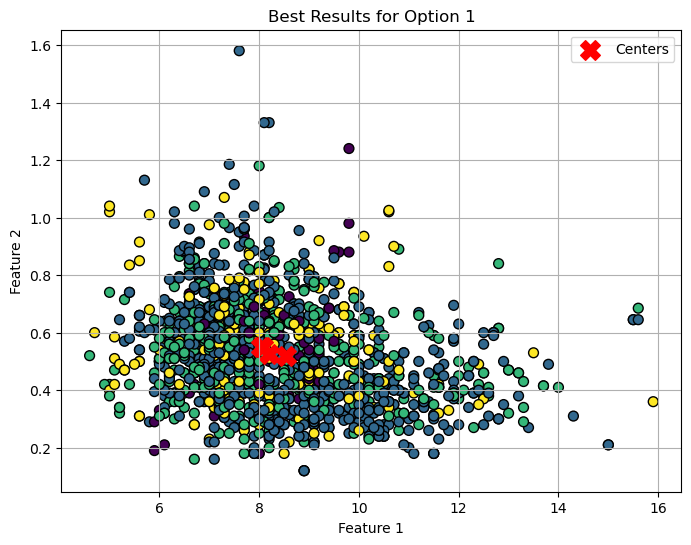

56.10967469215393


In [225]:
import time
start_time = time.time()
#print(elapsed_time)
# مثال على البيانات

data = df13

# تحديد عدد العناقيد
num_clusters = 4  # يمكنك تغيير هذا الرقم لتحديد عدد العناقيد
main(data, num_clusters-1)
elapsed_time = time.time() - start_time
print(elapsed_time)


In [ ]:
wcss, silhouette_avg ,db_index , ch_index =result_1(data, best_labels,best_centers)

In [189]:
print(best_labels)
print(best_centers)

data=df7
Point_Num=4
labels_1=best_labels
centers_1=best_centers
labels_1,centers_1,sse = My2_kmeans(data, 4)
wcss, silhouette_avg, db_index, ch_index = result_1(data, labels_1, centers_1)

[0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1
 0 0 0 0 1 0 2 2 0 0 2 2 0]
[[  8.21428571 173.28571429  70.64285714  22.84285714]
 [ 11.8125     272.5625      68.3125      28.375     ]
 [  5.59       112.4         65.6         17.27      ]
 [  2.95        62.7         53.9         11.51      ]]


ValueError: operands could not be broadcast together with shapes (12,) (4,) 

# كود جيد للشاملة اختيار بين محاولتين فقط العنقودين الذي لهما اكبر wss  (k>2)

C:\Users\Bassel\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


WCSS     : 72.616
Sil      : 0.318
DB       : 0.939
CH       : 50.013
Dunn     : 0.2543


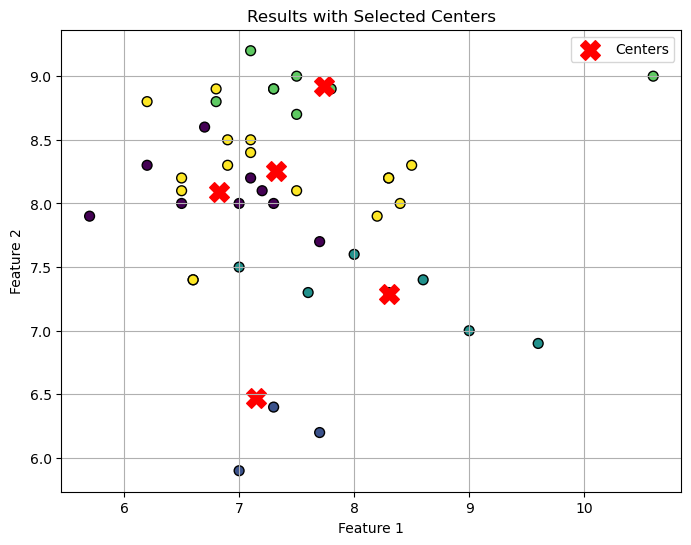

Elapsed Time: 0.3468 seconds
0.3468360900878906


In [467]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# دالة لاختيار المراكز الابتدائية بناءً على العنقود
def select_initial_centers(data, labels, cluster_index):
    cluster_points = data[labels == cluster_index]
    
    if len(cluster_points) == 0:
        return np.array([])

    center = np.mean(cluster_points, axis=0)
    distances = np.linalg.norm(cluster_points - center, axis=1)
    sorted_distances_indices = np.argsort(distances)

    median_index = int(len(sorted_distances_indices) * 0.75)
    center_first = cluster_points[sorted_distances_indices[median_index]]

    distances_to_first = np.linalg.norm(cluster_points - center_first, axis=1)
    farthest_index = np.argmax(distances_to_first)
    center_second = cluster_points[farthest_index]

    return np.array([center_first, center_second])

# دالة K-Means مخصصة
def My_kmeans_2(data, centers, max_iterations=100):
    k = len(centers)
    prev_centers = np.copy(centers)
    
    for iter in range(max_iterations):
       
        # Assign each point to the nearest center
        for i in range(len(data)):
            distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
            labels = np.argmin(distances, axis=1)
            point = data[i]
            # The distance between point i and the centers
            distances = np.linalg.norm(point - centers, axis=1)
            #Cluster number closest to the point i
            cluster_index = np.argmin(distances)
            # The value of the distance between point i and its nearest cluster
            dist_to_nearest_cluster = distances[cluster_index]
            
            # Test whether point i is located in the cluster nearest to it
            if (labels[i]==cluster_index): 
                #Arrange the distances in ascending order between point i and the centers
                sorted_distances_indices = np.argsort(distances) 
                #The number of the second nearest cluster to point i
                second_nearest_cluster_index = sorted_distances_indices[1]
                # The distance of the second closest cluster to point i
                dist_to_second_nearest_cluster = distances[second_nearest_cluster_index]  
                #The number of points in the cluster closest to the point i (n)
                num_points_in_nearest_cluster = np.sum(labels == cluster_index)
                
                # Precautionary condition (non-divisibility)  n>1
                if num_points_in_nearest_cluster > 1:
                    # Calculate distance D
                    D = (dist_to_nearest_cluster ) / (num_points_in_nearest_cluster - 1) + dist_to_nearest_cluster
                else:
                    D = dist_to_nearest_cluster 

                # Calculate distance E
                E = dist_to_second_nearest_cluster

                #If the distance after deletion is greater, point i is moved to the other cluster
                
                if E < D:
                    labels[i] = second_nearest_cluster_index                   
            else:
                labels[i]=cluster_index
                
               
            # Update cluster centers
        for j in range(k): 
                        cluster_points = data[labels == j]   
                        if len(cluster_points) > 0:
                           centers[j] = cluster_points.mean(axis=0)  

        # Check if cluster centers have changed 
        
        if np.all(centers == prev_centers):
            break
            

        prev_centers = np.copy(centers)

    distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
    wss = np.sum(np.min(distances, axis=1)**2)
        
           
    return labels, centers, wss

# رسم النتائج
def plot_results(data, labels, centers, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centers')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

def main(data, num_clusters):
    # تطبيق K-Means لعدد معين من العناقيد
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(data)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    # حساب WSS لكل عنقود
    wss_values = []
    for i in range(num_clusters):
        cluster_points = data[labels == i]
        if len(cluster_points) > 0:
            center = np.mean(cluster_points, axis=0)
            distances = np.linalg.norm(cluster_points - center, axis=1)
            wss = np.sum(distances ** 2)
            wss_values.append((i, wss))

    # ترتيب العناقيد بناءً على WSS واختيار الأكبر
    wss_values.sort(key=lambda x: x[1], reverse=True)
    largest_cluster_index = wss_values[0][0]  # أكبر عنقود
    second_largest_cluster_index = wss_values[1][0]  # ثاني أكبر عنقود

    # اختيار مركزين من أكبر عنقود
    initial_centers = select_initial_centers(data, labels, largest_cluster_index)

    # تطبيق الخوارزمية باستخدام أكبر عنقودين
    remaining_centers = np.delete(centers, largest_cluster_index, axis=0)
    combined_centers = np.vstack([remaining_centers, initial_centers])

    labels, final_centers, wss = My_kmeans_2(data, combined_centers)

    # عرض النتائج
    #print(f"Final Labels: {labels}")
    #print(f"Final Centers: \n{np.array2string(final_centers, separator=', ', formatter={'float_kind': lambda x: f'{x:.8f}'})}")
    #print(f"Final Centers: \n{final_centers}")
    #print(f"Within-Cluster Sum of Squares (WSS): {wss}\n")
    wcss, silhouette_avg ,db_index , ch_index =result_1(data, labels,final_centers)
    # رسم النتائج
    plot_results(data, labels, final_centers, "Results with Selected Centers")

# مثال على البيانات
import time
start_time = time.time()

# مثال على البيانات
data =df7  # استبدل ذلك ببياناتك الفعلية
#data = np.random.rand(50, 2)  # بيانات عشوائية لـ 500 نقطة في بعدين
#k = 2  # عدد العناقيد

# تحديد عدد العناقيد
num_clusters = 5  # يمكنك تغيير هذا الرقم لتحديد عدد العناقيد
main(data, num_clusters-1)
elapsed_time = time.time() - start_time
print(f"Elapsed Time: {elapsed_time:.4f} seconds")

print(elapsed_time)

C:\Users\Bassel\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


التسميات النهائية: [0 3 0 2 1 2 1 0 1 0 2 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 2 1 1 2 1 1 2
 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 2 1 0 2 1 1 1 1 1
 2 1 1 1 0 0 1 1 0 1 2 1 1 1 2 0 2 0 2 1 1 1 1 1 2 1 1 0 1 0 2 1 0 2 1 0 0
 0 2 0 1 1 1 1 1 0 2 1 0 0 2 0 0 2 1 1 0 0 2 2 2 1 0 0 1 1 0 0 1 2 2 2 2 0
 1 0]
المراكز النهائية: 
[[8.15925926, 0.52222222, 0.25592593, 2.64074074, 0.08577778, 19.05555556,
  48.40740741, 0.99693315, 3.32666667, 0.64074074, 10.25925926],
 [8.58823529, 0.49647059, 0.28176471, 2.33014706, 0.08116176, 8.23529412,
  20.86764706, 0.99655015, 3.29750000, 0.67838235, 10.66029412],
 [7.77777778, 0.61203704, 0.21703704, 2.24444444, 0.08796296, 21.62962963,
  95.14814815, 0.99671963, 3.34481481, 0.64851852, 9.99259259],
 [5.90000000, 0.29000000, 0.25000000, 13.40000000, 0.06700000,
  72.00000000, 160.00000000, 0.99721000, 3.33000000, 0.54000000,
  10.30000000]]
مجموع المربعات داخل العنقود (WSS): 23533.146569030985



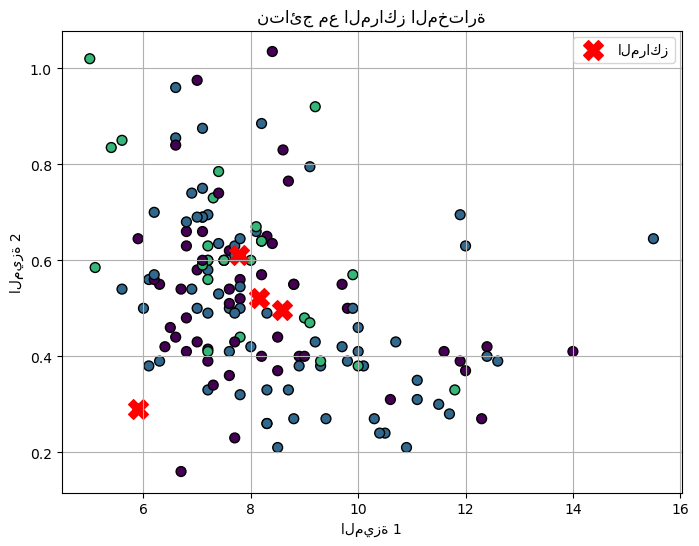

ValueError: operands could not be broadcast together with shapes (43,1,12) (4,11) 

In [463]:
import numpy as np
import time
start_time = time.time()
#np.random.seed(11)
sample_indices = np.random.choice(df13.shape[0], size=150, replace=False)

# أخذ العينة
sample_df13 = df13[sample_indices]
data = sample_df13  # استبدل ذلك ببياناتك الفعلية

# تحديد عدد العناقيد
num_clusters = 4  # يمكنك تغيير هذا الرقم لتحديد عدد العناقيد
main(data, num_clusters-1)

data=df7
k=2
centers=final_centers
labels, centers, wss = My_kmeans_2(data, final_centers)

elapsed_time = time.time() - start_time
#print(f"Elapsed Time: {elapsed_time:.4f} seconds")
print("All data")
wcss, silhouette_avg ,db_index , ch_index =result_1(data, labels,centers)
print(f"Elapsed Time: {elapsed_time:.4f} seconds")

In [357]:
data=df13
k=4
centers=final_centers
labels, centers, wss = My_kmeans_2(data, final_centers)

wcss, silhouette_avg ,db_index , ch_index =result_1(data, labels,centers)

WCSS     : 332991.275
Sil      : 0.523
DB       : 0.53
CH       : 2524.426
Dunn     : 0.0143


# The Suggested algorithm I

In [1064]:
############    The Suggested algorithm I    ########

import numpy as np
def My_kmeans_2(data, k, max_iterations=100):
    centers=final_centers
    #print(centers)
    
    distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)    
    labels = np.argmin(distances, axis=1)
         
    prev_centers = np.copy(centers)
    wss=0.0
    #print(centers)
    a=0
    #Start repeating until there is no change in centers
    for iter in range(max_iterations):
       
        # Assign each point to the nearest center
        for i in range(len(data)):              
            point = data[i]
            # The distance between point i and the centers
            distances = np.linalg.norm(point - centers, axis=1)
            #Cluster number closest to the point i
            cluster_index = np.argmin(distances)
            # The value of the distance between point i and its nearest cluster
            dist_to_nearest_cluster = distances[cluster_index]
            
            # Test whether point i is located in the cluster nearest to it
            if (labels[i]==cluster_index): 
                #Arrange the distances in ascending order between point i and the centers
                sorted_distances_indices = np.argsort(distances) 
                #The number of the second nearest cluster to point i
                second_nearest_cluster_index = sorted_distances_indices[1]
                # The distance of the second closest cluster to point i
                dist_to_second_nearest_cluster = distances[second_nearest_cluster_index]  
                #The number of points in the cluster closest to the point i (n)
                num_points_in_nearest_cluster = np.sum(labels == cluster_index)
                
                # Precautionary condition (non-divisibility)  n>1
                if num_points_in_nearest_cluster > 1:
                    # Calculate distance D
                    D = (dist_to_nearest_cluster ) / (num_points_in_nearest_cluster - 1) + dist_to_nearest_cluster
                else:
                    D = dist_to_nearest_cluster 

                # Calculate distance E
                E = dist_to_second_nearest_cluster

                #If the distance after deletion is greater, point i is moved to the other cluster
                
                if E < D:
                    labels[i] = second_nearest_cluster_index                   
            else:
                labels[i]=cluster_index
                
                

            # Update cluster centers
        for j in range(k): 
                        cluster_points = data[labels == j]   
                        if len(cluster_points) > 0:
                           centers[j] = cluster_points.mean(axis=0)  

        # Check if cluster centers have changed 
        
        if np.all(centers == prev_centers):
            break

       
        prev_centers = np.copy(centers)
        #print(centers)
    
    return labels, centers, wss

In [1066]:
data=df7
k=4
#centers=final_centers
labels, centers, wss = My_kmeans_2(data, 4)

wcss, silhouette_avg ,db_index , ch_index =result_1(data, labels,centers)

ValueError: operands could not be broadcast together with shapes (43,1,12) (4,11) 

In [346]:
final_centers = np.array(final_centers)
print(final_centers)

[[7.89139344e+00 5.75225410e-01 2.73319672e-01 3.17786885e+00
  8.96885246e-02 2.59651639e+01 1.06516393e+02 9.96986189e-01
  3.29286885e+00 6.57500000e-01 1.00002049e+01]
 [7.90000000e+00 3.00000000e-01 6.80000000e-01 8.30000000e+00
  5.00000000e-02 3.75000000e+01 2.83500000e+02 9.93160000e-01
  3.01000000e+00 5.10000000e-01 1.23000000e+01]
 [8.47339109e+00 5.19900990e-01 2.68601485e-01 2.36293317e+00
  8.45655941e-02 8.97029703e+00 2.23106436e+01 9.96622550e-01
  3.31139851e+00 6.46596535e-01 1.05766914e+01]
 [8.28495413e+00 5.19174312e-01 2.71944954e-01 2.49229358e+00
  9.09100917e-02 2.15146789e+01 5.45284404e+01 9.96836642e-01
  3.31996330e+00 6.76110092e-01 1.03774924e+01]]


In [350]:
import numpy as np
np.random.seed(11)
sample_indices = np.random.choice(df13.shape[0], size=300, replace=False)

# أخذ العينة
sample_df13 = df13[sample_indices]

In [344]:
import pandas as pd

# تحويل المصفوفة إلى DataFrame
final_centers = pd.DataFrame(final_centers, columns=[f'Feature {i+1}' for i in range(final_centers.shape[1])])
print(final_centers)

   Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0   7.891393   0.575225   0.273320   3.177869   0.089689  25.965164   
1   7.900000   0.300000   0.680000   8.300000   0.050000  37.500000   
2   8.473391   0.519901   0.268601   2.362933   0.084566   8.970297   
3   8.284954   0.519174   0.271945   2.492294   0.090910  21.514679   

    Feature 7  Feature 8  Feature 9  Feature 10  Feature 11  
0  106.516393   0.996986   3.292869    0.657500   10.000205  
1  283.500000   0.993160   3.010000    0.510000   12.300000  
2   22.310644   0.996623   3.311399    0.646597   10.576691  
3   54.528440   0.996837   3.319963    0.676110   10.377492  


# الخوارزمية الشاملة باستخدام k means  التقليدية

C:\Users\Bassel\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 0 2 0 2 3 0 0 2 1 3 0 3 1 3 3 0 1 0 2 0 1 0 2 3 3 0 1 2 0 0 0 1 3 2 2
 3 2 0 1 2 2 3 1 2 2 1 1 2]
التسميات النهائية: [3 3 3 1 3 1 2 3 4 1 0 2 3 2 0 2 2 3 0 4 1 3 0 3 1 2 2 3 0 1 3 3 4 0 2 1 1
 2 1 3 0 1 1 2 0 1 1 0 0 1]
المراكز النهائية: 
[[2.95000000, 62.70000000, 53.90000000, 11.51000000],
 [8.21428571, 173.28571429, 70.64285714, 22.84285714],
 [5.59000000, 112.40000000, 65.60000000, 17.27000000],
 [11.48461538, 260.69230769, 69.30769231, 29.09230769],
 [13.23333333, 324.00000000, 64.00000000, 25.26666667]]
مجموع المربعات داخل العنقود (WSS): 24824.06430618953



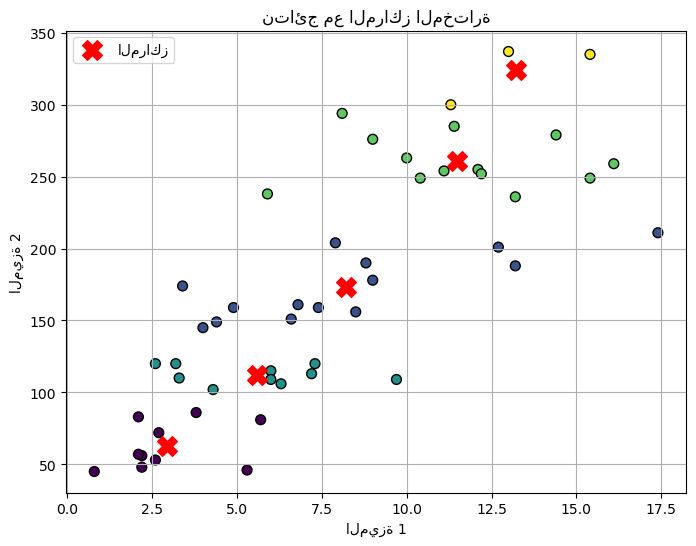

الوقت المستغرق: 0.3973 ثواني


In [1063]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def select_initial_centers(data, labels, cluster_index):
    """اختيار مركزين ابتدائيين من العنقود المحدد بناءً على التشتت."""
    cluster_points = data[labels == cluster_index]
    
    if len(cluster_points) == 0:
        return np.array([])

    center = np.mean(cluster_points, axis=0)
    distances = np.linalg.norm(cluster_points - center, axis=1)
    sorted_indices = np.argsort(distances)

    median_index = int(len(sorted_indices) * 0.50)
    center_first = cluster_points[sorted_indices[median_index]]

    distances_to_first = np.linalg.norm(cluster_points - center_first, axis=1)
    farthest_index = np.argmax(distances_to_first)
    center_second = cluster_points[farthest_index]

    return np.array([center_first, center_second])

def My_kmeans_2(data, centers, max_iterations=100):
    """خوارزمية K-means مخصصة مع منطق تعزيز تعيين المراكز."""
    k = len(centers)
    prev_centers = np.copy(centers)
    
    for iter in range(max_iterations):
        # تعيين كل نقطة إلى أقرب مركز
        distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
        labels = np.argmin(distances, axis=1)

        for i in range(len(data)):
            point = data[i]
            distances = np.linalg.norm(point - centers, axis=1)
            cluster_index = np.argmin(distances)
            dist_to_nearest = distances[cluster_index]

            if labels[i] == cluster_index:
                sorted_indices = np.argsort(distances)
                second_nearest_index = sorted_indices[1]
                dist_to_second = distances[second_nearest_index]
                num_points_in_cluster = np.sum(labels == cluster_index)

                if num_points_in_cluster > 1:
                    D = (dist_to_nearest) / (num_points_in_cluster - 1) + dist_to_nearest
                else:
                    D = dist_to_nearest

                if dist_to_second < D:
                    labels[i] = second_nearest_index
            
        # تحديث مراكز العنقود
        for j in range(k): 
            cluster_points = data[labels == j]   
            if len(cluster_points) > 0:
                centers[j] = cluster_points.mean(axis=0)

        # التحقق من التقارب
        if np.all(centers == prev_centers):
            break
        
        prev_centers = np.copy(centers)

    distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
    wss = np.sum(np.min(distances, axis=1)**2)
        
    return labels, centers, wss

def plot_results(data, labels, centers, title):
    """رسم نتائج العنقود."""
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='المراكز')
    plt.title(title)
    plt.xlabel('الميزة 1')
    plt.ylabel('الميزة 2')
    plt.legend()
    plt.grid()
    plt.show()

def main(data, num_clusters):
    """الدالة الرئيسية لتنفيذ خوارزمية K-means."""
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(data)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    print(labels)

    # حساب مجموع المربعات داخل العنقود (WSS)
    wss_values = []
    for i in range(num_clusters):
        cluster_points = data[labels == i]
        if len(cluster_points) > 0:
            center = np.mean(cluster_points, axis=0)
            distances = np.linalg.norm(cluster_points - center, axis=1)
            wss = np.sum(distances ** 2)
            wss_values.append((i, wss))

    # ترتيب العناقيد بناءً على WSS واختيار الأكبر
    wss_values.sort(key=lambda x: x[1], reverse=True)
    largest_cluster_index = wss_values[0][0]
    second_largest_cluster_index = wss_values[1][0]

    # اختيار مركزين من أكبر عنقود
    initial_centers = select_initial_centers(data, labels, largest_cluster_index)

    # دمج المراكز لتطبيق خوارزمية K-means المخصصة
    remaining_centers = np.delete(centers, largest_cluster_index, axis=0)
    combined_centers = np.vstack([remaining_centers, initial_centers])

    labels, final_centers, wss = My_kmeans_2(data, combined_centers)

    # عرض النتائج
    print(f"التسميات النهائية: {labels}")
    print(f"المراكز النهائية: \n{np.array2string(final_centers, separator=', ', formatter={'float_kind': lambda x: f'{x:.8f}'})}")
    print(f"مجموع المربعات داخل العنقود (WSS): {wss}\n")

    # رسم النتائج
    plot_results(data, labels, final_centers, "نتائج مع المراكز المختارة")

# مثال على الاستخدام
import time
start_time = time.time()

# توليد بيانات عشوائية
#data = np.random.rand(100, 2)  # بيانات عشوائية لـ 100 نقطة في بعدين
data=df5
num_clusters = 5  # تحديد عدد العناقيد
main(data, num_clusters-1)

elapsed_time = time.time() - start_time
print(f"الوقت المستغرق: {elapsed_time:.4f} ثواني")
# centers=final_centers
# wcss, silhouette_avg ,db_index , ch_index =result_1(data, labels,centers)


In [390]:
print(final_centers)

[[7.89139344e+00 5.75225410e-01 2.73319672e-01 3.17786885e+00
  8.96885246e-02 2.59651639e+01 1.06516393e+02 9.96986189e-01
  3.29286885e+00 6.57500000e-01 1.00002049e+01]
 [7.90000000e+00 3.00000000e-01 6.80000000e-01 8.30000000e+00
  5.00000000e-02 3.75000000e+01 2.83500000e+02 9.93160000e-01
  3.01000000e+00 5.10000000e-01 1.23000000e+01]
 [8.47339109e+00 5.19900990e-01 2.68601485e-01 2.36293317e+00
  8.45655941e-02 8.97029703e+00 2.23106436e+01 9.96622550e-01
  3.31139851e+00 6.46596535e-01 1.05766914e+01]
 [8.28495413e+00 5.19174312e-01 2.71944954e-01 2.49229358e+00
  9.09100917e-02 2.15146789e+01 5.45284404e+01 9.96836642e-01
  3.31996330e+00 6.76110092e-01 1.03774924e+01]]


#  الخوارزمية الشاملة    , واختبار اكبر 2 قيمة wss  مع My_kmeans_2

In [1310]:
###############    جاهزة ان شاء الله   ################
#############      الكود كامل مقارنة 2 اكبر عنقود واختيار الافضل  
import numpy as np
import matplotlib.pyplot as plt

##  select_extreme_points فقط لاول خطوة
def select_extreme_points(data, center):
    distances = np.linalg.norm(data - center, axis=1)
    point_a = data[np.argmin(distances)]
    distances_to_a = np.linalg.norm(data - point_a, axis=1)
    point_b = data[np.argmax(distances_to_a)]
    return point_a, point_b

# دالة لاختيار المراكز الابتدائية بناءً على العنقود
import numpy as np

# def sel_initial_centers(data, labels, cluster_index):  ##(متوسط المسافة بين المركز وابعد نقطتين عن بعضهما)
#     cluster_points = data[labels == cluster_index]

#     if len(cluster_points) < 2:  # تأكد من وجود نقطتين على الأقل
#         return np.array([])

#     center = np.mean(cluster_points, axis=0)  # حساب المركز
#     distances = np.linalg.norm(cluster_points - center, axis=1)

#     # إيجاد أبعد نقطتين
#     max_distance = 0
#     point_first = None
#     point_second = None

#     for i in range(len(cluster_points)):
#         for j in range(i + 1, len(cluster_points)):
#             distance_between = np.linalg.norm(cluster_points[i] - cluster_points[j])
#             if distance_between > max_distance:
#                 max_distance = distance_between
#                 point_first, point_second = cluster_points[i], cluster_points[j]

#     # حساب المركز الابتدائي الأول
#     center_first = (point_first + center) / 2
#     # حساب المركز الابتدائي الثاني
#     center_second = (point_second + center) / 2

#     return np.array([center_first, center_second])


def sel_initial_centers(data, labels, cluster_index):  ## الابعد عن النقطة الاولى (الطريقة الاولى)
    cluster_points = data[labels == cluster_index]
    
    if len(cluster_points) == 0:
        return np.array([])

    center = np.mean(cluster_points, axis=0)
    distances = np.linalg.norm(cluster_points - center, axis=1)
    sorted_distances_indices = np.argsort(distances)

    median_index = int(len(sorted_distances_indices) * 0.75)
    center_first = cluster_points[sorted_distances_indices[median_index]]

    distances_to_first = np.linalg.norm(cluster_points - center_first, axis=1)
    farthest_index = np.argmax(distances_to_first)
    center_second = cluster_points[farthest_index]

    return np.array([center_first, center_second])


# دالة K-Means مع k=2
def My_kmeans_2_int_k2(data, k, max_iterations=100):
    center = calculate_center(data)
    point_a, point_b = select_extreme_points(data, center)
    centers = np.array([point_a, point_b])
    
    labels = np.zeros(data.shape[0], dtype=int)
    prev_centers = np.copy(centers)    

    for iter in range(max_iterations):

        # Assign each point to the nearest center
        for i in range(len(data)):              
            point = data[i]
            # The distance between point i and the centers
            distances = np.linalg.norm(point - centers, axis=1)
            #Cluster number closest to the point i
            cluster_index = np.argmin(distances)
            # The value of the distance between point i and its nearest cluster
            dist_to_nearest_cluster = distances[cluster_index]
            
            # Test whether point i is located in the cluster nearest to it
            if (labels[i]==cluster_index): 
                #Arrange the distances in ascending order between point i and the centers
                sorted_distances_indices = np.argsort(distances) 
                #The number of the second nearest cluster to point i
                second_nearest_cluster_index = sorted_distances_indices[1]
                # The distance of the second closest cluster to point i
                dist_to_second_nearest_cluster = distances[second_nearest_cluster_index]  
                #The number of points in the cluster closest to the point i (n)
                num_points_in_nearest_cluster = np.sum(labels == cluster_index)
                
                # Precautionary condition (non-divisibility)  n>1
                if num_points_in_nearest_cluster > 1:
                    # Calculate distance D
                    D = (dist_to_nearest_cluster ) / (num_points_in_nearest_cluster - 1) + dist_to_nearest_cluster
                else:
                    D = dist_to_nearest_cluster 

                # Calculate distance E
                E = dist_to_second_nearest_cluster

                #If the distance after deletion is greater, point i is moved to the other cluster
                
                if E < D:
                    labels[i] = second_nearest_cluster_index                   
            else:
                labels[i]=cluster_index
                
                

            # Update cluster centers
        for j in range(k): 
                        cluster_points = data[labels == j]   
                        if len(cluster_points) > 0:
                           centers[j] = cluster_points.mean(axis=0)  

        # Check if cluster centers have changed 
        
        if np.all(centers == prev_centers):
            break
            
      
        prev_centers = np.copy(centers)
    #wcss, silhouette_avg ,db_index , ch_index =result_1(data, labels,centers)
    return labels, centers

# دالة K-Means مخصصة
def My_kmeans_2_c(data, centers, max_iterations=100):
    k = len(centers)
    prev_centers = np.copy(centers)
    
    for iter in range(max_iterations):
       
        # Assign each point to the nearest center
        for i in range(len(data)):
            distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
            labels = np.argmin(distances, axis=1)
            point = data[i]
            # The distance between point i and the centers
            distances = np.linalg.norm(point - centers, axis=1)
            #Cluster number closest to the point i
            cluster_index = np.argmin(distances)
            # The value of the distance between point i and its nearest cluster
            dist_to_nearest_cluster = distances[cluster_index]
            
            # Test whether point i is located in the cluster nearest to it
            if (labels[i]==cluster_index): 
                #Arrange the distances in ascending order between point i and the centers
                sorted_distances_indices = np.argsort(distances) 
                #The number of the second nearest cluster to point i
                second_nearest_cluster_index = sorted_distances_indices[1]
                # The distance of the second closest cluster to point i
                dist_to_second_nearest_cluster = distances[second_nearest_cluster_index]  
                #The number of points in the cluster closest to the point i (n)
                num_points_in_nearest_cluster = np.sum(labels == cluster_index)
                
                # Precautionary condition (non-divisibility)  n>1
                if num_points_in_nearest_cluster > 1:
                    # Calculate distance D
                    D = (dist_to_nearest_cluster ) / (num_points_in_nearest_cluster - 1) + dist_to_nearest_cluster
                else:
                    D = dist_to_nearest_cluster 

                # Calculate distance E
                E = dist_to_second_nearest_cluster

                #If the distance after deletion is greater, point i is moved to the other cluster
                
                if E < D:
                    labels[i] = second_nearest_cluster_index                   
            else:
                labels[i]=cluster_index
                
               
            # Update cluster centers
        for j in range(k): 
                        cluster_points = data[labels == j]   
                        if len(cluster_points) > 0:
                           centers[j] = cluster_points.mean(axis=0)  

        # Check if cluster centers have changed 
        
        if np.all(centers == prev_centers):
            break
            

        prev_centers = np.copy(centers)

    distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
    wss = np.sum(np.min(distances, axis=1)**2)
        
           
    return labels, centers, wss
# # رسم النتائج
# def plot_results(data, labels, centers, title):
#     plt.figure(figsize=(8, 6))
#     plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
#     plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centers')
#     plt.title(title)
#     plt.xlabel('Feature 1')
#     plt.ylabel('Feature 2')
#     plt.legend()
#     plt.grid()
#     plt.show()


def main_1(data, target_clusters):
       
    labels,centers = My_kmeans_2_int_k2(data, 2)
##### اريد رسم يظهر فيه كل البيانات ومركز كل البيانات بالاضافة الى النقطتين التي تم اختيارهما كمركزين ابتدائيين من الدالة sel_initial_centers

    # تكرار العملية لكل عدد من العناقيد حتى العدد المستهدف
    for k in range(3, target_clusters ):
        
        # حساب WSS لكل عنقود
        wss_values = []
        for i in range(num_clusters):  
            cluster_points = data[labels == i]
            if len(cluster_points) > 0:
                center = np.mean(cluster_points, axis=0)
                distances = np.linalg.norm(cluster_points - center, axis=1)
                wss = np.sum(distances ** 2)
                wss_values.append((i, wss))
    
        # ترتيب العناقيد بناءً على WSS واختيار الأكبر
        wss_values.sort(key=lambda x: x[1], reverse=True)
        largest_cluster_index = wss_values[0][0]  # أكبر عنقود
        second_largest_cluster_index = wss_values[1][0]  # ثاني أكبر عنقود
        
        
        # اختيار مركزين من أكبر عنقود
        new_centers_lar = sel_initial_centers(data, labels, largest_cluster_index)
##### اريد رسم النقطتين الابتدائيتين من الدالة sel_initial_centers طبعا مع التمييز نقاط كل عنقود بللون مختلف
              
        # دمج المراكز
        remaining_centers_lar = np.delete(centers, largest_cluster_index, axis=0)
        combined_centers_lar  = np.vstack([remaining_centers_lar, new_centers_lar])
        
        
        # تطبيق K-Means مع المراكز الجديدة
        labels_lar, centers_lar, wss_lar = My_kmeans_2_c(data, combined_centers_lar)
               
        ######################   الاختبار 2 second_largest_cluster_index   #######
              
        new_centers_s = sel_initial_centers(data, labels, second_largest_cluster_index)
               
        # دمج المراكز
        remaining_centers_s = np.delete(centers, second_largest_cluster_index, axis=0)
        combined_centers_s  = np.vstack([remaining_centers_s, new_centers_s])
        
        # تطبيق K-Means مع المراكز الجديدة
        labels_s, centers_s, wss_s = My_kmeans_2_c(data, combined_centers_s)
             
        if wss_lar <= wss_s:
            new_centers=combined_centers_lar
            labels, centers, wss = My_kmeans_2_c(data, new_centers)
           
        else:
            new_centers=combined_centers_s
            labels, centers, wss = My_kmeans_2_c(data, new_centers)
           
    # رسم النتائج النهائية
    #plot_results(data, labels, centers, f"Final K-Means Clustering Results (K={target_clusters})")
    lab_com=labels
    cen_com=centers
    wcss, silhouette_avg ,db_index , ch_index =result_1(data, labels,centers)
    unique_lab_com, counts = np.unique(lab_com, return_counts=True)
    for label, count in zip(unique_lab_com, counts):
        print(f'Cluster {label + 1}: {count} points')
    return lab_com, cen_com


## تطبيق الشاملة

In [1319]:
import time
start_time = time.time()

# استبدل ذلك ببياناتك الفعلية
data = df5
Point_Num=4

target_clusters =  4  # يمكنك تغيير هذا الرقم لتحديد عدد العناقيد
lab_com,cen_com = main_1(data, target_clusters+1)
elapsed_time = time.time() - start_time
print(f"Elapsed Time: {elapsed_time:.4f} seconds")
#print(cen_com)
print("My2_kmeans")
#labels_1=lab_com
#centers_1=cen_com
#labels_1,centers_1,sse = My2_kmeans(data,4)
#wcss, silhouette_avg, db_index, ch_index = result_1(data, labels_1, centers_1)
elapsed_time = time.time() - start_time
print(f"Elapsed Time: {elapsed_time:.4f} seconds")

WCSS     : 34728.629
Sil      : 0.501
DB       : 0.587
CH       : 141.762
Dunn     : 0.2298
Cluster 1: 16 points
Cluster 2: 14 points
Cluster 3: 10 points
Cluster 4: 10 points
Elapsed Time: 0.3525 seconds
My2_kmeans
Elapsed Time: 0.3525 seconds


## تطبيق الشاملة للعينات الكبيرة  "استخدام عينات"

In [1113]:
#data=df13

data=df13_3

target_clusters = 4  # عدد العناقيد المستهدفة

import numpy as np
import pandas as pd
import time
start_time = time.time()

# الخطوة 1: أخذ عينة من البيانات
sample_size = 500  # تحديد حجم العينة
sample_indices = np.random.choice(df13.shape[0], size=sample_size, replace=False)
data_sample = df13[sample_indices]  
# الخطوة 2: إيجاد المراكز الابتدائية

lab_com, cen_com = main_1(data_sample, target_clusters + 1)

# الخطوة 3: تطبيق K-Means على البيانات الكاملة
 

elapsed_time = time.time() - start_time
print(f"Elapsed Time: {elapsed_time:.4f} seconds")

WCSS     : 102778.493
Sil      : 0.527
DB       : 0.538
CH       : 811.898
Dunn     : 0.021
Cluster 1: 1 points
Cluster 2: 276 points
Cluster 3: 146 points
Cluster 4: 77 points
WCSS     : 999474.552
Sil      : 0.525
DB       : 0.533
CH       : 7581.34
Dunn     : 0.0111
Elapsed Time: 103.8620 seconds


In [1115]:
labels, centers, wss = My_kmeans_2_c(data, cen_com)
wcss, silhouette_avg, db_index, ch_index = result_1(data, labels, centers)


WCSS     : 999474.552
Sil      : 0.525
DB       : 0.533
CH       : 7581.34
Dunn     : 0.0111


#  clara  التقليدية

In [1122]:
import time
start_time = time.time()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# دالة CLARA لتطبيق خوارزمية K-Means على عينة من البيانات
def clara(data, n_clusters, n_samples=100):
    # أخذ عينة عشوائية من البيانات
    sample_indices = np.random.choice(data.shape[0], n_samples, replace=False)
    sample_data = data[sample_indices]  # استخدام المصفوفة مباشرة
    
    # تنفيذ K-Means على العينة
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)  # تحديد random_state لتكرار النتائج
    kmeans.fit(sample_data)
    
    # الحصول على مراكز العناقيد
    centers = kmeans.cluster_centers_
    
    # تجميع البيانات الكاملة بناءً على المراكز
    labels = kmeans.predict(data)  # توقعات التجميع لجميع البيانات
    unique_lab_com, counts = np.unique(labels, return_counts=True)
    for label, count in zip(unique_lab_com, counts):
        print(f'Cluster {label + 1}: {count} points')
    return labels, centers

# استخدام df13 مباشرة
data = df13_3  # إذا كانت df13 مصفوفة NumPy تحتوي على بيانات رقمية

# تأكد من وجود بيانات كافية
if data.shape[0] < 200:
    n_samples = data.shape[0]  # إذا كانت البيانات أقل من 200، استخدم عدد البيانات الكامل

# عدد العناقيد وعدد العينات
n_clusters = 4  # يمكنك تغيير هذا الرقم
n_samples = 400  # عدد العينات لاستخدامها في CLARA

# تطبيق CLARA
labels, centers = clara(data, n_clusters, n_samples)
wcss, silhouette_avg, db_index, ch_index = result_1(data, labels, centers)
elapsed_time = time.time() - start_time
print(f"Elapsed Time: {elapsed_time:.4f} seconds")

# رسم النتائج


Cluster 1: 2205 points
Cluster 2: 792 points
Cluster 3: 1494 points
Cluster 4: 306 points
WCSS     : 858939.871
Sil      : 0.487
DB       : 0.714
CH       : 9197.815
Dunn     : 0.0067
Elapsed Time: 1.5490 seconds


# clara  الشاملة

In [1125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# إنشاء بيانات تجريبية
data, _ = make_blobs(n_samples=1000, centers=5, cluster_std=0.60, random_state=0)

# تنفيذ CLARA
def clara(data, n_clusters):
    # هنا يمكنك استخدام K-Means كجزء من CLARA
    sample_indices = np.random.choice(data.shape[0], size=300, replace=False)
    sample_data = data[sample_indices]
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(sample_data)
    return labels, kmeans.cluster_centers_

# تنفيذ CLARANS
def clarans(data, n_clusters, n_iterations=100):
    best_cost = np.inf
    best_labels = None
    best_centers = None
    
    for _ in range(n_iterations):
        initial_centers = data[np.random.choice(data.shape[0], n_clusters, replace=False)]
        kmeans = KMeans(n_clusters=n_clusters, init=initial_centers, n_init=1)
        labels = kmeans.fit_predict(data)
        cost = kmeans.inertia_
        
        if cost < best_cost:
            best_cost = cost
            best_labels = labels
            best_centers = kmeans.cluster_centers_

    return best_labels, best_centers

# عدد العناقيد
n_clusters = 5

# تنفيذ الخوارزميات
labels_clara, centers_clara = clara(data, n_clusters)
labels_clarans, centers_clarans = clarans(data, n_clusters)

# تقييم الأداء
# silhouette_clara = silhouette_score(data, labels_clara)
# silhouette_clarans = silhouette_score(data, labels_clarans)
labels=labels_clara
wcss, silhouette_avg, db_index, ch_index = result_1(data, labels_clara, centers_clara)

wcss, silhouette_avg, db_index, ch_index = result_1(data, labels_clarans, centers_clarans)

print(labels_clara)
print(centers_clara)


WCSS     : 686.233


ValueError: Found input variables with inconsistent numbers of samples: [1000, 300]

# 1111

In [1160]:
import numpy as np
import matplotlib.pyplot as plt

# دالة لاختيار المراكز الابتدائية بناءً على العنقود
def sel_initial_centers(data, labels, cluster_index):
    cluster_points = data[labels == cluster_index]
    
    if len(cluster_points) == 0:
        return np.array([])

    center = np.mean(cluster_points, axis=0)
    distances = np.linalg.norm(cluster_points - center, axis=1)
    sorted_distances_indices = np.argsort(distances)

    # اختيار المركز الأول بناءً على القيمة المتوسطة (median) للمسافات
    median_index = int(len(sorted_distances_indices) * 0.5)
    center_first = cluster_points[sorted_distances_indices[median_index]]

    # حساب المسافة بين المركز الأول ومركز العنقود
    distance_to_center_first = np.linalg.norm(center_first - center)

    # إيجاد المركز الثاني
    center_second = None
    min_diff = float('inf')  # لتخزين الفرق الأدنى بين المسافات

    for point in cluster_points:
        distance_to_point = np.linalg.norm(point - center)

        # تحقق من أن المسافة بين المركزين بعيدة
        distance_between_centers = np.linalg.norm(center_first - point)

        # تحقق من أن المسافة بين المركزين قريبة
        if abs(distance_to_point - distance_to_center_first) < 0.1:  # عتبة مقبولة
            if distance_between_centers > min_diff:
                center_second = point
                min_diff = distance_between_centers

    if center_second is None:
        return np.array([])  # إذا لم يتم العثور على مركز ثاني مناسب

    return np.array([center_first, center_second])

# دالة K-Means مع k=2
def My_kmeans_2_int_k2(data, k, max_iterations=100):
    # اختيار نقطتين ابتدائيتين
    point_a, point_b = data[np.random.choice(data.shape[0], size=2, replace=False)]
    centers = np.array([point_a, point_b])
    
    labels = np.zeros(data.shape[0], dtype=int)
    prev_centers = np.copy(centers)    

    for iter in range(max_iterations):
        # Assign each point to the nearest center
        for i in range(len(data)):              
            point = data[i]
            distances = np.linalg.norm(point - centers, axis=1)
            cluster_index = np.argmin(distances)
            dist_to_nearest_cluster = distances[cluster_index]
            
            if (labels[i] == cluster_index): 
                sorted_distances_indices = np.argsort(distances) 
                second_nearest_cluster_index = sorted_distances_indices[1]
                dist_to_second_nearest_cluster = distances[second_nearest_cluster_index]  
                num_points_in_nearest_cluster = np.sum(labels == cluster_index)
                
                if num_points_in_nearest_cluster > 1:
                    D = (dist_to_nearest_cluster) / (num_points_in_nearest_cluster - 1) + dist_to_nearest_cluster
                else:
                    D = dist_to_nearest_cluster 

                E = dist_to_second_nearest_cluster

                if E < D:
                    labels[i] = second_nearest_cluster_index                   
            else:
                labels[i] = cluster_index
                
        # Update cluster centers
        for j in range(k): 
            cluster_points = data[labels == j]   
            if len(cluster_points) > 0:
                centers[j] = cluster_points.mean(axis=0)  

        if np.all(centers == prev_centers):
            break
            
        prev_centers = np.copy(centers)

    return labels, centers

# دالة K-Means مخصصة
def My_kmeans_2_c(data, centers, max_iterations=100):
    k = len(centers)
    prev_centers = np.copy(centers)
    
    for iter in range(max_iterations):
        for i in range(len(data)):
            distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
            labels = np.argmin(distances, axis=1)
            
            point = data[i]
            distances = np.linalg.norm(point - centers, axis=1)
            cluster_index = np.argmin(distances)
            dist_to_nearest_cluster = distances[cluster_index]
            
            if (labels[i] == cluster_index): 
                sorted_distances_indices = np.argsort(distances) 
                second_nearest_cluster_index = sorted_distances_indices[1]
                dist_to_second_nearest_cluster = distances[second_nearest_cluster_index]  
                num_points_in_nearest_cluster = np.sum(labels == cluster_index)
                
                if num_points_in_nearest_cluster > 1:
                    D = (dist_to_nearest_cluster) / (num_points_in_nearest_cluster - 1) + dist_to_nearest_cluster
                else:
                    D = dist_to_nearest_cluster 

                E = dist_to_second_nearest_cluster

                if E < D:
                    labels[i] = second_nearest_cluster_index                   
            else:
                labels[i] = cluster_index
                
        # Update cluster centers
        for j in range(k): 
            cluster_points = data[labels == j]   
            if len(cluster_points) > 0:
                centers[j] = cluster_points.mean(axis=0)  

        if np.all(centers == prev_centers):
            break
            
        prev_centers = np.copy(centers)

    distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
    wss = np.sum(np.min(distances, axis=1)**2)
        
    return labels, centers, wss

# دالة لرسم النتائج
def plot_results(data, labels, centers, title, highlight_points=None):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centers')
    
    if highlight_points is not None and highlight_points.ndim == 2 and highlight_points.shape[1] == 2:  # تحقق من الأبعاد
        plt.scatter(highlight_points[:, 0], highlight_points[:, 1], c='blue', marker='o', s=150, label='Initial Centers', edgecolor='black')
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

def main_1(data, target_clusters):
    labels, centers = My_kmeans_2_int_k2(data, 2)
    
    # رسم النتائج الأولية
    plot_results(data, labels, centers, "K-Means Clustering Results (K=2)", highlight_points=centers)

    for k in range(3, target_clusters):
        wss_values = []
        for i in range(np.max(labels) + 1):  
            cluster_points = data[labels == i]
            if len(cluster_points) > 0:
                center = np.mean(cluster_points, axis=0)
                distances = np.linalg.norm(cluster_points - center, axis=1)
                wss = np.sum(distances ** 2)
                wss_values.append((i, wss))
    
        wss_values.sort(key=lambda x: x[1], reverse=True)
        largest_cluster_index = wss_values[0][0]
        second_largest_cluster_index = wss_values[1][0]
        
        new_centers_lar = sel_initial_centers(data, labels, largest_cluster_index)
        
        # تحقق من أن new_centers_lar ليست فارغة
        if new_centers_lar.size == 0:
            print("No valid initial centers found for the largest cluster.")
            continue  # أو يمكنك اتخاذ إجراء آخر مثل استخدام مراكز بديلة

        # رسم النقطتين الابتدائيتين
        plot_results(data, labels, centers, "Initial Centers from Largest Cluster", highlight_points=new_centers_lar)

        remaining_centers_lar = np.delete(centers, largest_cluster_index, axis=0)
        combined_centers_lar  = np.vstack([remaining_centers_lar, new_centers_lar])
        
        labels_lar, centers_lar, wss_lar = My_kmeans_2_c(data, combined_centers_lar)
        
        new_centers_s = sel_initial_centers(data, labels, second_largest_cluster_index)
        
        if new_centers_s.size == 0:
            print("No valid initial centers found for the second largest cluster.")
            continue  # يمكنك اتخاذ إجراء آخر
        
        remaining_centers_s = np.delete(centers, second_largest_cluster_index, axis=0)
        combined_centers_s  = np.vstack([remaining_centers_s, new_centers_s])
        
        labels_s, centers_s, wss_s = My_kmeans_2_c(data, combined_centers_s)
             
        if wss_lar <= wss_s:
            new_centers = combined_centers_lar
            labels, centers, wss = My_kmeans_2_c(data, new_centers)
        else:
            new_centers = combined_centers_s
            labels, centers, wss = My_kmeans_2_c(data, new_centers)
           
    lab_com = labels
    cen_com = centers

    # هنا يمكنك إضافة أي تحليل للنتائج مثل حساب WSS أو مقاييس أخرى
    unique_lab_com, counts = np.unique(lab_com, return_counts=True)
    for label, count in zip(unique_lab_com, counts):
        print(f'Cluster {label + 1}: {count} points')
    
    return lab_com, cen_com

# تجربة المراكز الابتدائية

In [1390]:
import numpy as np
import matplotlib.pyplot as plt

# دالة لاختيار المراكز الابتدائية بناءً على العنقود
#     return np.array([])  # إذا لم يتم العثور على النقاط المناسبة

import numpy as np

def sel_initial_centers(data, labels, cluster_index):
    cluster_points = data[labels == cluster_index]

    if len(cluster_points) < 2:  # تأكد من وجود نقطتين على الأقل
        return np.array([])

    center = np.mean(cluster_points, axis=0)  # حساب المركز
    distances = np.linalg.norm(cluster_points - center, axis=1)

    # إيجاد أبعد نقطتين
    max_distance = 0
    point_first = None
    point_second = None

    for i in range(len(cluster_points)):
        for j in range(i + 1, len(cluster_points)):
            distance_between = np.linalg.norm(cluster_points[i] - cluster_points[j])
            if distance_between > max_distance:
                max_distance = distance_between
                point_first, point_second = cluster_points[i], cluster_points[j]

    # حساب المركز الابتدائي الأول
    center_first = (point_first + center) / 2
    # حساب المركز الابتدائي الثاني
    center_second = (point_second + center) / 2

    return np.array([center_first, center_second])

# دالة K-Means مع k=2
def My_kmeans_2_int_k2(data, k, max_iterations=100):
    labels = np.zeros(data.shape[0], dtype=int)
    centers = sel_initial_centers(data, labels, cluster_index=0)
    plot_results(data, labels, centers,  title="Choosing the first two initial centers")

    
    # center = np.mean(data, axis=0)
    # point_a, point_b = data[np.random.choice(data.shape[0], size=2, replace=False)]
    # centers = np.array([point_a, point_b])

    # labels = np.zeros(data.shape[0], dtype=int)
    prev_centers = np.copy(centers)    

    for iter in range(max_iterations):
        # Assign each point to the nearest center
        for i in range(len(data)):
            point = data[i]
            distances = np.linalg.norm(point - centers, axis=1)
            cluster_index = np.argmin(distances)
            labels[i] = cluster_index
            
        # Update cluster centers
        for j in range(k):
            cluster_points = data[labels == j]
            if len(cluster_points) > 0:
                centers[j] = cluster_points.mean(axis=0)

        # Check if cluster centers have changed
        if np.all(centers == prev_centers):
            break
            
        prev_centers = np.copy(centers)

    return labels, centers

# دالة K-Means مخصصة
def My_kmeans_2_c(data, centers, max_iterations=100):
    k = len(centers)
    prev_centers = np.copy(centers)
    
    for iter in range(max_iterations):
        # Assign each point to the nearest center
        distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
        labels = np.argmin(distances, axis=1)

        for j in range(k):
            cluster_points = data[labels == j]
            if len(cluster_points) > 0:
                centers[j] = cluster_points.mean(axis=0)

        # Check if cluster centers have changed
        if np.all(centers == prev_centers):
            break
            
        prev_centers = np.copy(centers)

    distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
    wss = np.sum(np.min(distances, axis=1)**2)
    
    return labels, centers, wss

# دالة لرسم النتائج
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def plot_results(data, labels, centers, new_centers=None, title="K-Means Clustering"):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    
    # رسم المراكز التقليدية
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centers')
    
    # رسم المراكز الجديدة إذا كانت موجودة
    if new_centers is not None:
        plt.scatter(new_centers[:, 0], new_centers[:, 1], c='blue', marker='o', s=200, label='New Centers')

    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    
    # تخصيص موقع الوسيلة
    plt.legend(loc='center right', bbox_to_anchor=(1.10, 0.95))
    
    plt.grid()
    plt.show()
def main_1(data, target_clusters):
    

    labels, centers = My_kmeans_2_int_k2(data, 2)

    # رسم البيانات مع المراكز الابتدائية
    plot_results(data, labels, centers, title="Two K-Means Clustering")

    # تكرار العملية لكل عدد من العناقيد حتى العدد المستهدف
    for k in range(3, target_clusters):
        # حساب WSS لكل عنقود
        wss_values = []
        num_clusters = np.max(labels) + 1  # عدد العناقيد الحالية
        
        for i in range(num_clusters):
            cluster_points = data[labels == i]
            if len(cluster_points) > 0:
                center = np.mean(cluster_points, axis=0)
                distances = np.linalg.norm(cluster_points - center, axis=1)
                wss = np.sum(distances ** 2)
                wss_values.append((i, wss))

        # ترتيب العناقيد بناءً على WSS واختيار الأكبر
        wss_values.sort(key=lambda x: x[1], reverse=True)
        largest_cluster_index = wss_values[0][0]
        second_largest_cluster_index = wss_values[1][0]

        # اختيار مراكز جديدة من أكبر عنقود
        new_centers_lar = sel_initial_centers(data, labels, largest_cluster_index)

        if new_centers_lar.size == 0:
            print(f"No valid initial centers found for the largest cluster index {largest_cluster_index}.")
            continue

        # رسم النقطتين الجديدتين
        plot_results(data, labels, centers, new_centers=new_centers_lar, title="Initial centers of the chosen cluster")

        # دمج المراكز
        remaining_centers_lar = np.delete(centers, largest_cluster_index, axis=0)
        combined_centers_lar = np.vstack([remaining_centers_lar, new_centers_lar])

        # تطبيق K-Means مع المراكز الجديدة
        labels_lar, centers_lar, wss_lar = My_kmeans_2_c(data, combined_centers_lar)

        # اختيار مراكز جديدة من ثاني أكبر عنقود
        new_centers_s = sel_initial_centers(data, labels, second_largest_cluster_index)

        if new_centers_s.size == 0:
            print(f"No valid initial centers found for the second largest cluster index {second_largest_cluster_index}.")
            continue

        # رسم النقطتين الجديدتين
        plot_results(data, labels, centers, new_centers=new_centers_s, title="New Centers from Second Largest Cluster")

        # دمج المراكز
        remaining_centers_s = np.delete(centers, second_largest_cluster_index, axis=0)
        combined_centers_s = np.vstack([remaining_centers_s, new_centers_s])

        # تطبيق K-Means مع المراكز الجديدة
        labels_s, centers_s, wss_s = My_kmeans_2_c(data, combined_centers_s)

        if wss_lar <= wss_s:
            new_centers = combined_centers_lar
            labels, centers, wss = My_kmeans_2_c(data, new_centers)
            plot_results(data, labels, centers, new_centers=new_centers_lar, title="Centers for k=4")
        else:
            new_centers = combined_centers_s
            labels, centers, wss = My_kmeans_2_c(data, new_centers)
            plot_results(data, labels, centers, new_centers=new_centers_lar, title=" Centers for k=4")

    # رسم النتائج النهائية
    plot_results(data, labels, centers, title=f"Final K-Means Clustering Results (K={target_clusters})")

    unique_lab_com, counts = np.unique(labels, return_counts=True)
    for label, count in zip(unique_lab_com, counts):
        print(f'Cluster {label + 1}: {count} points')

    return lab_com, cen_com
import numpy as np
import matplotlib.pyplot as plt

def plot_results(data, labels, centers, new_centers=None, title="K-Means Clustering"):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    
    # رسم المراكز التقليدية
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centers')
    #plt.scatter(centers[:, 0], centers[:, 1], c='blue', marker='o', s=200, label='initial centers')
    # رسم المراكز الجديدة إذا كانت موجودة
    # if new_centers is not None:
    #     plt.scatter(new_centers[:, 0], new_centers[:, 1], c='blue', marker='o', s=200, label='initial centers')

    # حساب مركز البيانات
    #data_center = np.mean(data, axis=0)
    #plt.scatter(data_center[0], data_center[1], c='red', marker='o', s=200, edgecolor='black', label='Data Center')

    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    
    # تخصيص موقع الوسيلة
    plt.legend(loc='center right', bbox_to_anchor=(0, 0.95))
    
    plt.grid()
    plt.show()

# باقي الكود كما هو...  
    return labels, centers

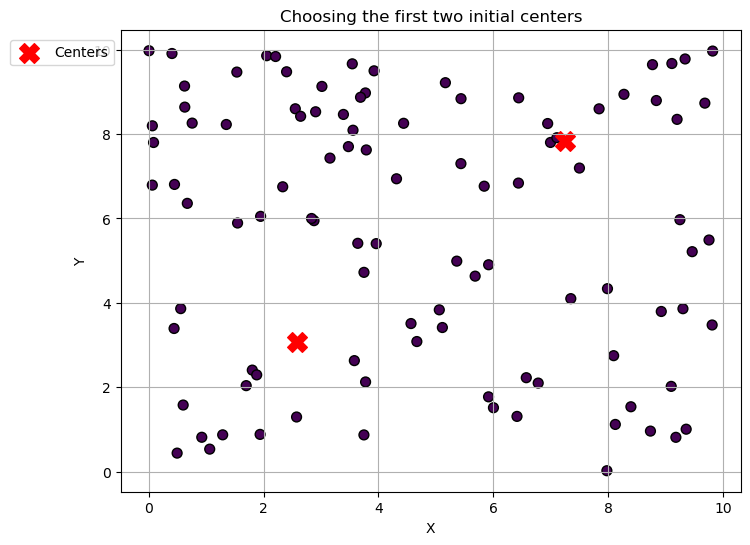

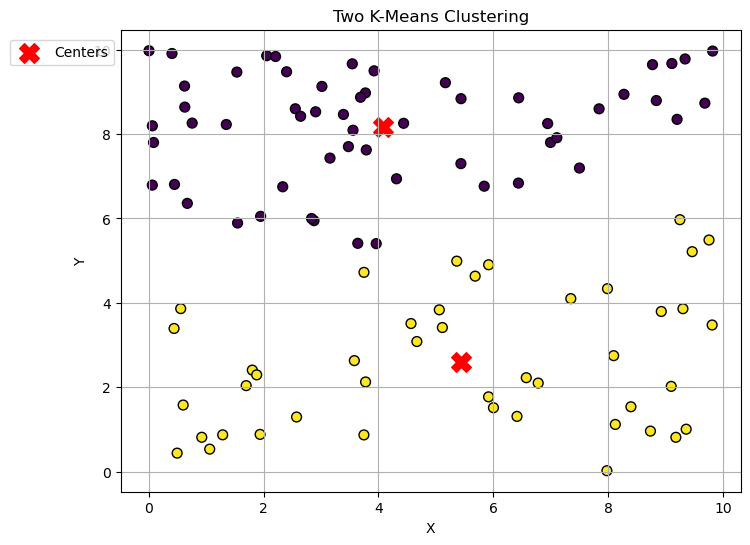

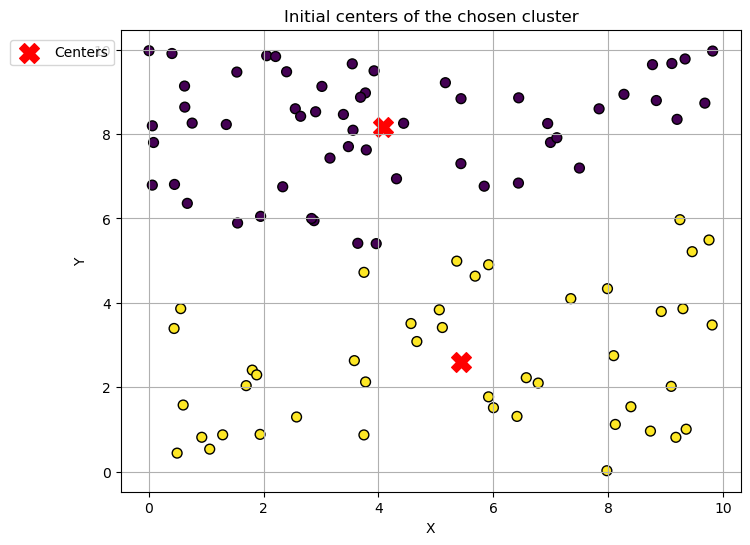

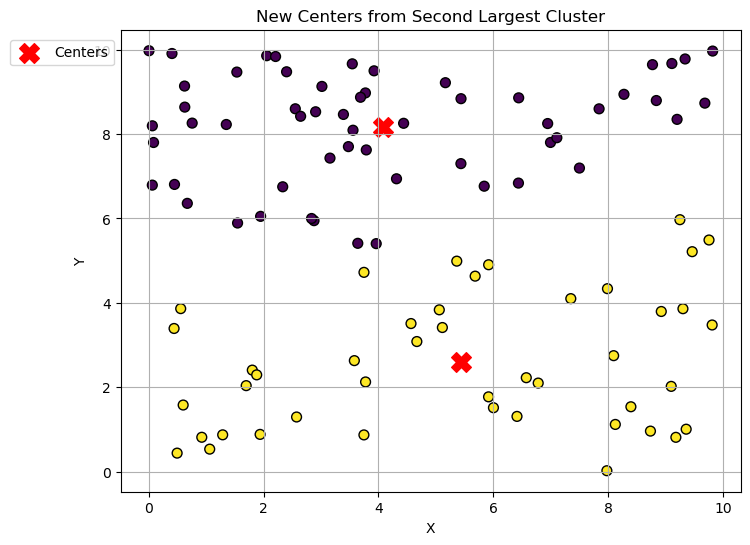

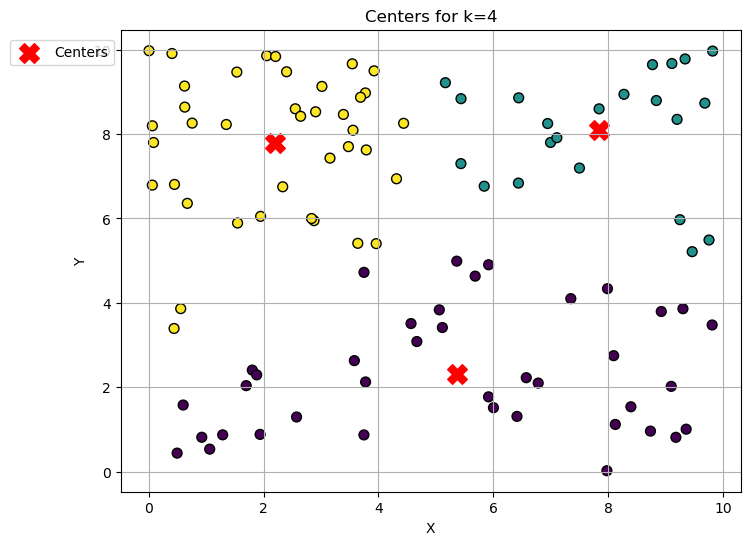

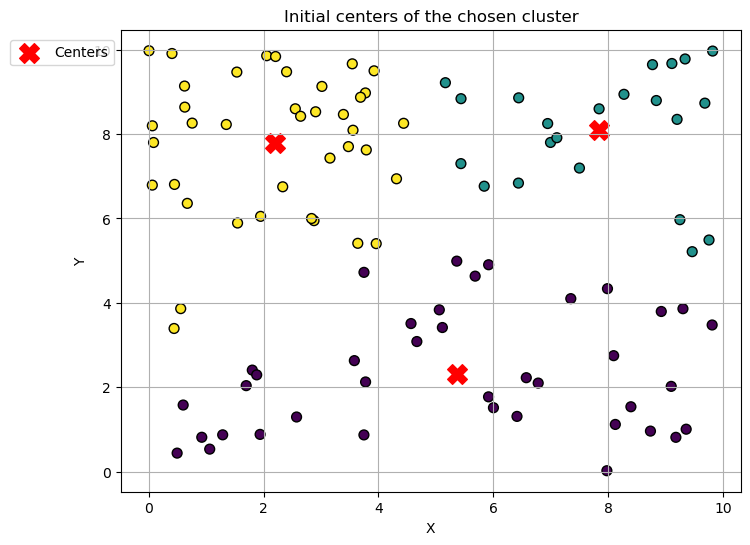

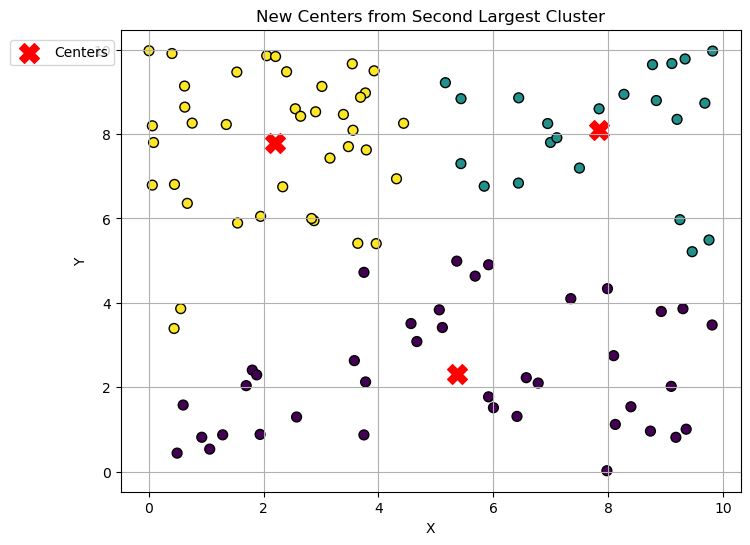

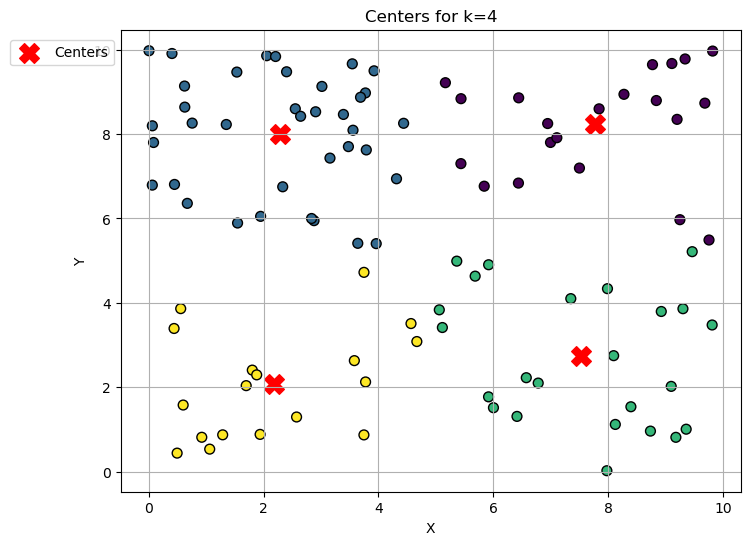

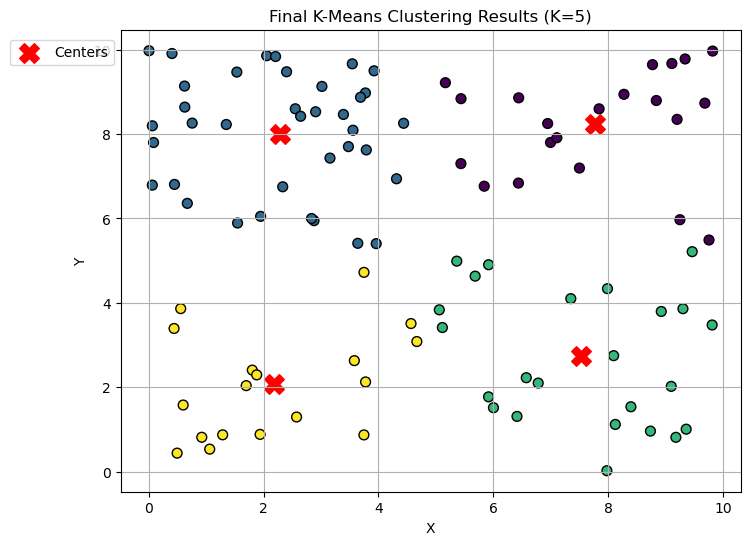

Cluster 1: 21 points
Cluster 2: 37 points
Cluster 3: 24 points
Cluster 4: 18 points
Elapsed Time: 11.8490 seconds
My2_kmeans
WCSS     : 199.882
Sil      : 0.454
DB       : 0.738
CH       : 131.235
Dunn     : 0.148
Elapsed Time: 11.9976 seconds


In [1391]:
import time
start_time = time.time()

# استبدل ذلك ببياناتك الفعلية
data = df100

Point_Num=4

target_clusters =  4  # يمكنك تغيير هذا الرقم لتحديد عدد العناقيد
lab_com,cen_com = main_1(data, target_clusters+1)
elapsed_time = time.time() - start_time
print(f"Elapsed Time: {elapsed_time:.4f} seconds")
#print(cen_com)
print("My2_kmeans")
labels_1=lab_com
centers_1=cen_com
labels_1,centers_1,sse = My2_kmeans(data,4)
wcss, silhouette_avg, db_index, ch_index = result_1(data, labels_1, centers_1)
elapsed_time = time.time() - start_time
print(f"Elapsed Time: {elapsed_time:.4f} seconds")

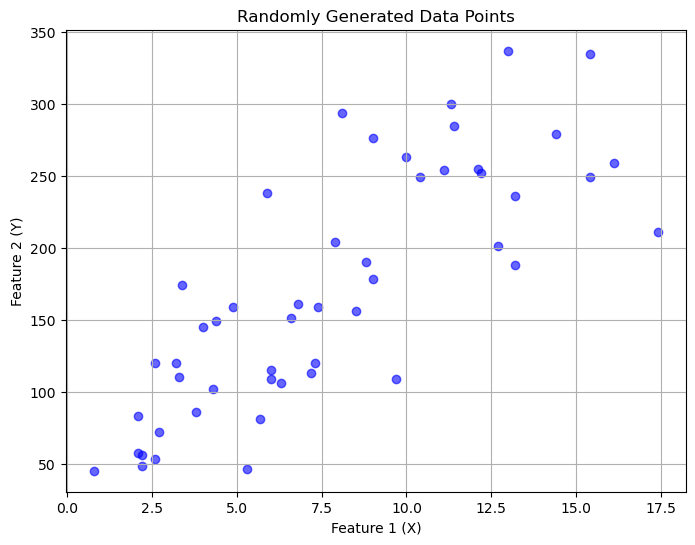

In [1323]:
import numpy as np
import matplotlib.pyplot as plt

# تحديد عدد النقاط
num_points = 100

# توليد بيانات عشوائية من متغيرين (x, y)
# يمكن ضبط النطاقات حسب الحاجة
x = np.random.uniform(low=0, high=10, size=num_points)
y = np.random.uniform(low=0, high=10, size=num_points)

# دمج المتغيرين في مصفوفة
df100 = np.column_stack((x, y))

# رسم البيانات
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], color='blue', alpha=0.6)
plt.title('Randomly Generated Data Points')
plt.xlabel('Feature 1 (X)')
plt.ylabel('Feature 2 (Y)')
plt.grid()
plt.show()